In [54]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
import random
from scipy import stats
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
# Metrics --------------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score

# Dataset creation

In [55]:
# Load the Dataset
df_rating_books_raw = pd.read_csv('../data/processed/filtered_data_processed.csv')

df_rating_books_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      15738 non-null  int64  
 1   review          15738 non-null  float64
 2   text            15738 non-null  object 
 3   review_year     15738 non-null  int64  
 4   publisher       15738 non-null  object 
 5   categories      15738 non-null  object 
 6   published_year  15738 non-null  int64  
 7   helpfulness     15738 non-null  float64
 8   num_row         15738 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.1+ MB


In [56]:
df_rating_books_processed = df_rating_books_raw.drop(['Unnamed: 0'], axis=1)

In [57]:
df_vader_sentiment_raw = pd.read_csv('../data/processed/df_reduced_with_sentiment.csv')

df_vader_sentiment_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15734 entries, 0 to 15733
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          15734 non-null  int64  
 1   num_row             15734 non-null  int64  
 2   text_clean          15734 non-null  object 
 3   text_complexity     15734 non-null  float64
 4   compound_sentiment  15734 non-null  float64
 5   word_count          15734 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 737.7+ KB


In [58]:
df_vader_sentiment_processed = df_vader_sentiment_raw.drop(['Unnamed: 0'], axis=1)
df_vader_sentiment_processed.sample()

num_row                                         text_clean  \
11177    11180  classic book dear heart must say however doe b...   

       text_complexity  compound_sentiment  word_count  
11177              5.0              0.3818          15

In [59]:
df_all_data_processed = df_rating_books_processed.merge(df_vader_sentiment_processed, on='num_row', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15734 entries, 0 to 15733
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              15734 non-null  float64
 1   text                15734 non-null  object 
 2   review_year         15734 non-null  int64  
 3   publisher           15734 non-null  object 
 4   categories          15734 non-null  object 
 5   published_year      15734 non-null  int64  
 6   helpfulness         15734 non-null  float64
 7   num_row             15734 non-null  int64  
 8   text_clean          15734 non-null  object 
 9   text_complexity     15734 non-null  float64
 10  compound_sentiment  15734 non-null  float64
 11  word_count          15734 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 1.4+ MB


In [60]:
#Original Text is removed as clean text is added
df_all_data_processed = df_all_data_processed.drop(['text'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15734 entries, 0 to 15733
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              15734 non-null  float64
 1   review_year         15734 non-null  int64  
 2   publisher           15734 non-null  object 
 3   categories          15734 non-null  object 
 4   published_year      15734 non-null  int64  
 5   helpfulness         15734 non-null  float64
 6   num_row             15734 non-null  int64  
 7   text_clean          15734 non-null  object 
 8   text_complexity     15734 non-null  float64
 9   compound_sentiment  15734 non-null  float64
 10  word_count          15734 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 1.3+ MB


In [61]:
df_all_data_processed = df_all_data_processed.drop(['num_row'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15734 entries, 0 to 15733
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              15734 non-null  float64
 1   review_year         15734 non-null  int64  
 2   publisher           15734 non-null  object 
 3   categories          15734 non-null  object 
 4   published_year      15734 non-null  int64  
 5   helpfulness         15734 non-null  float64
 6   text_clean          15734 non-null  object 
 7   text_complexity     15734 non-null  float64
 8   compound_sentiment  15734 non-null  float64
 9   word_count          15734 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 1.2+ MB


In [62]:
df_all_data_processed.sample(10)

review  review_year publisher categories  published_year  helpfulness  \
1200     3.0         2004   Penguin    Fiction            2004     0.727273   
7085     5.0         2011     Other    Fiction            2007     1.000000   
8290     5.0         2008     Other      Other            2006     0.500000   
2996     5.0         2013     Other    Fiction            2007     1.000000   
1578     4.0         2010    Anchor      Other            2004     1.000000   
5431     4.0         2006     Other    Fiction            2006     0.625000   
4389     5.0         2005     Other    Fiction            2004     1.000000   
1457     4.0         2007     Other      Other            2005     0.888889   
9287     4.0         2008     Other      Other            2006     1.000000   
2735     5.0         2005   Penguin    Fiction            2004     0.000000   

                                             text_clean  text_complexity  \
1200  first heard sequel michael marshall straw men ...             11.1   
7085  else say jessica stein take time create clear ...              3.7   
8290  ultimate reference book duke basketball cover ...              3.6   
2996  daughter yers old using eye patch since age lo...              5.2   
1578  banner heaven jon krakauer attempt relate hist...             12.4   
5431  expected enjoy book really enjoyed author rece...              7.6   
4389  year old daughter love book think night eater ...              5.7   
1457  really good book however people understand str...              9.0   
9287  book invaluable tool learning use image manipu...              8.2   
2735  second acclaimed sharpe series sharpe eagle fi...             14.8   

      compound_sentiment  word_count  
1200              0.9955         358  
7085              0.8979          17  
8290             -0.1280          16  
2996              0.5994          10  
1578              0.4939         198  
5431              0.9800          99  
4389              0.9927          57  
1457              0.8122          18  
9287              0.9790         142  
2735             -0.6597          43

In [63]:
ordered_columns = ['categories', 'publisher', 'published_year', 'review_year', 'helpfulness', 'text_clean','compound_sentiment','text_complexity','word_count', 'review']

In [64]:
df_all_data_processed = df_all_data_processed[ordered_columns]

In [65]:
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15734 entries, 0 to 15733
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   categories          15734 non-null  object 
 1   publisher           15734 non-null  object 
 2   published_year      15734 non-null  int64  
 3   review_year         15734 non-null  int64  
 4   helpfulness         15734 non-null  float64
 5   text_clean          15734 non-null  object 
 6   compound_sentiment  15734 non-null  float64
 7   text_complexity     15734 non-null  float64
 8   word_count          15734 non-null  int64  
 9   review              15734 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 1.2+ MB


In [66]:
df_all_data_processed.sample(10)

categories       publisher  published_year  review_year  \
8892                       Other           Other            2010         2010   
11409  Biography & Autobiography           Other            2004         2007   
3133                     Fiction           Other            2008         2011   
15452                      Other           Other            2008         2010   
11860                    Fiction  Harper Collins            2009         2012   
14012                    Fiction           Other            2009         2009   
1719                     Fiction           Other            2006         2009   
15315                   Religion  Harper Collins            2009         2013   
3626                     Fiction           Other            2009         2013   
3882                       Other           Other            2004         2005   

       helpfulness                                         text_clean  \
8892      1.000000  book wonderful addition week composer study mo...   
11409     1.000000  ultimate diana die hard fan anyone appreciativ...   
3133      0.000000  unlike book brief gaudy hour actually improves...   
15452     1.000000  impression doctor akin sherlock holmes fightin...   
11860     1.000000  book hank early year miserable upbringing brin...   
14012     1.000000  classic glad book kindle edition reasonable pr...   
1719      0.333333  jeffry archer great story teller find short st...   
15315     1.000000  kljhh lhjg jhg jhg jhg jhg jhg jhg jhg jhg jhg...   
3626      1.000000  loved whole english garden series love way wea...   
3882      1.000000  book contains lot information useful new skier...   

       compound_sentiment  text_complexity  word_count  review  
8892               0.7269              5.0          23     5.0  
11409              0.8625              8.7          12     5.0  
3133               0.9818              8.6          74     3.0  
15452              0.9531             10.2          78     5.0  
11860             -0.4939              5.4          14     3.0  
14012              0.9578              6.9          69     5.0  
1719               0.9246              9.5          24     4.0  
15315              0.0000              9.9          19     5.0  
3626               0.9698              5.5          20     5.0  
3882               0.7579              3.0          17     5.0

In [67]:
df_all_data_processed['publisher'] = pd.Categorical(df_all_data_processed['publisher'])
df_all_data_processed['categories'] = pd.Categorical(df_all_data_processed['categories'])

In [68]:
df_final = df_all_data_processed.copy()
df_final.to_csv('../data/final/df_final.csv')

# Train Test Split


In [69]:
#Divide Data Set into Train Test Datasets
X = df_final.copy().drop(['review'], axis=1)
y = df_final['review'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1530) #stratify: para definir los datasets de forma proporcional acorde a y.

X_train.sample(5)

categories       publisher  published_year  review_year  helpfulness  \
14538    Fiction  Harper Collins            2004         2012     1.000000   
9576     Fiction         Penguin            2006         2009     1.000000   
3366       Other           Other            2006         2006     1.000000   
13814    Fiction           Other            2006         2006     1.000000   
2703       Other           Other            2005         2005     0.666667   

                                              text_clean  compound_sentiment  \
14538  book favorite household read several time day ...              0.7506   
9576   watching made television movie based book say ...              0.8591   
3366   like spellbound akeelah bee book help get amer...              0.9908   
13814  last book dark elf trilogy tell tale drizzt fa...              0.9697   
2703   found potato yet simply irrestible easy apply ...              0.9374   

       text_complexity  word_count  
14538              2.8          20  
9576               8.1          30  
3366               8.7         140  
13814              9.0          80  
2703               7.9          49

In [70]:
df_train = X_train.copy()
df_train['review'] = y.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12587 entries, 5508 to 2317
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   categories          12587 non-null  category
 1   publisher           12587 non-null  category
 2   published_year      12587 non-null  int64   
 3   review_year         12587 non-null  int64   
 4   helpfulness         12587 non-null  float64 
 5   text_clean          12587 non-null  object  
 6   compound_sentiment  12587 non-null  float64 
 7   text_complexity     12587 non-null  float64 
 8   word_count          12587 non-null  int64   
 9   review              12587 non-null  float64 
dtypes: category(2), float64(4), int64(3), object(1)
memory usage: 910.3+ KB


# Analysis and EDA for target feature

In [71]:
df_train['review'].value_counts()

review
5.0    7433
4.0    2568
3.0    1122
1.0     811
2.0     653
Name: count, dtype: int64

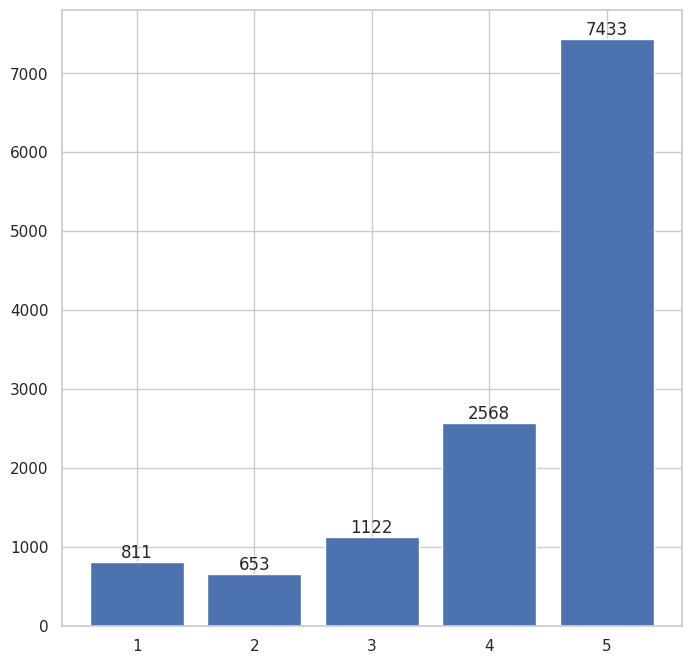

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['review'].value_counts(ascending=True).keys(), df_train['review'].value_counts(ascending=True))
ax.bar_label(bars)
plt.show()

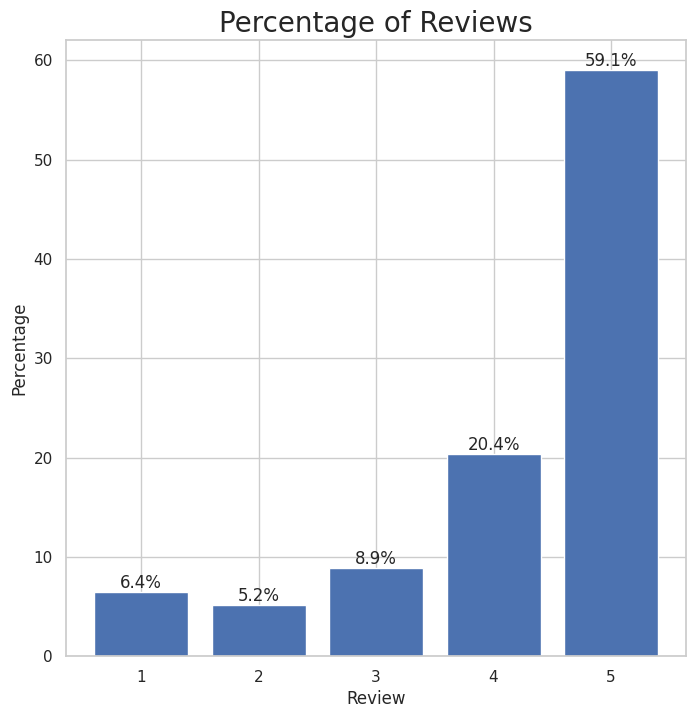

In [73]:
#Show a barplot by Percentages
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['review'].value_counts(ascending=True).keys(), (df_train['review'].value_counts(ascending=True))/(df_train['review'].value_counts(ascending=True).sum())*100)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Review')
plt.ylabel('Percentage')
plt.title('Percentage of Reviews', fontsize = 20)
plt.show()

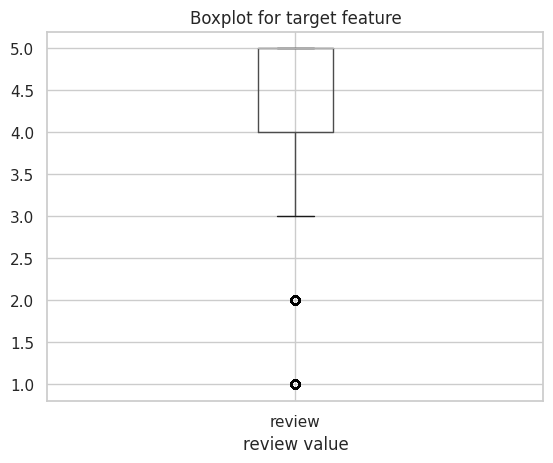

In [74]:
#Create a box plot to check for outliers, median and quartiles
df_train.boxplot(column='review')
plt.xlabel("review value")
plt.title("Boxplot for target feature")
plt.show()

In [75]:
df_train['review'].describe().T

count    12587.000000
mean         4.204338
std          1.193913
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review, dtype: float64

## Key Findings:
- The Dataset is unbalanced. Having 79.5% of the entries with a High/Postive review [4, 5]. Only 11.6% of the entries have a Low/Negative review [1, 2]. And 8.9% of the entries reviews are neutral [3]
- The Dataset review target feature is biased. Having the 25% Quartile above 4, and 50% and 75% Quartiles on 5. 
- The entries on the dataset with a low review [1, 2] are almost considered as outliers on the boxplot.

# Univariate EDA

## Categories

In [76]:
categories = df_train['categories']
categories.info()

<class 'pandas.core.series.Series'>
Index: 12587 entries, 5508 to 2317
Series name: categories
Non-Null Count  Dtype   
--------------  -----   
12587 non-null  category
dtypes: category(1)
memory usage: 111.0 KB


In [77]:
print(f'Total of Categories: {len(categories.unique())}')

Total of Categories: 10


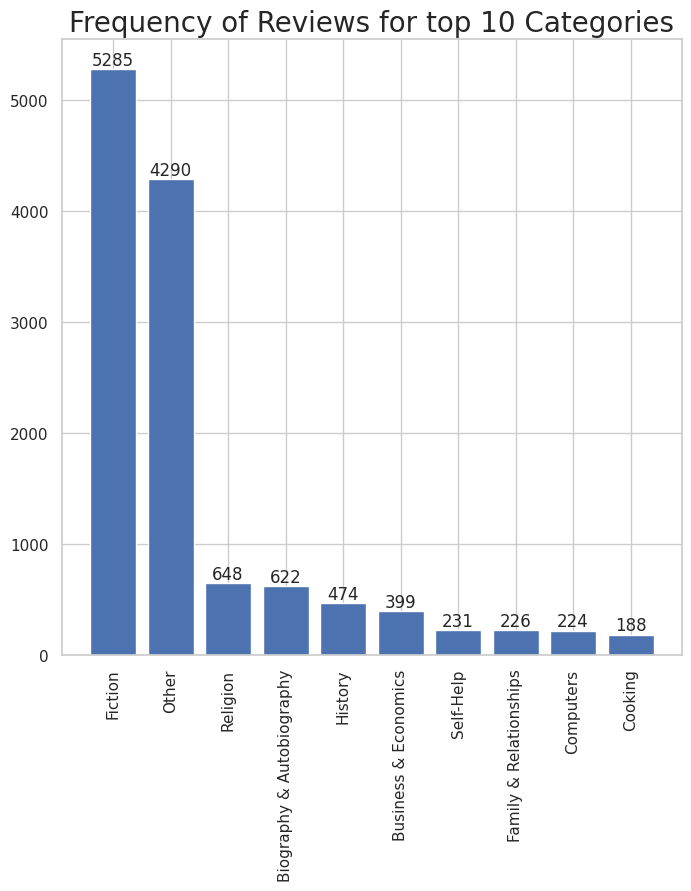

In [78]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['categories'].value_counts(ascending=False).keys(), df_train['categories'].value_counts(ascending=False))
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Categories', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

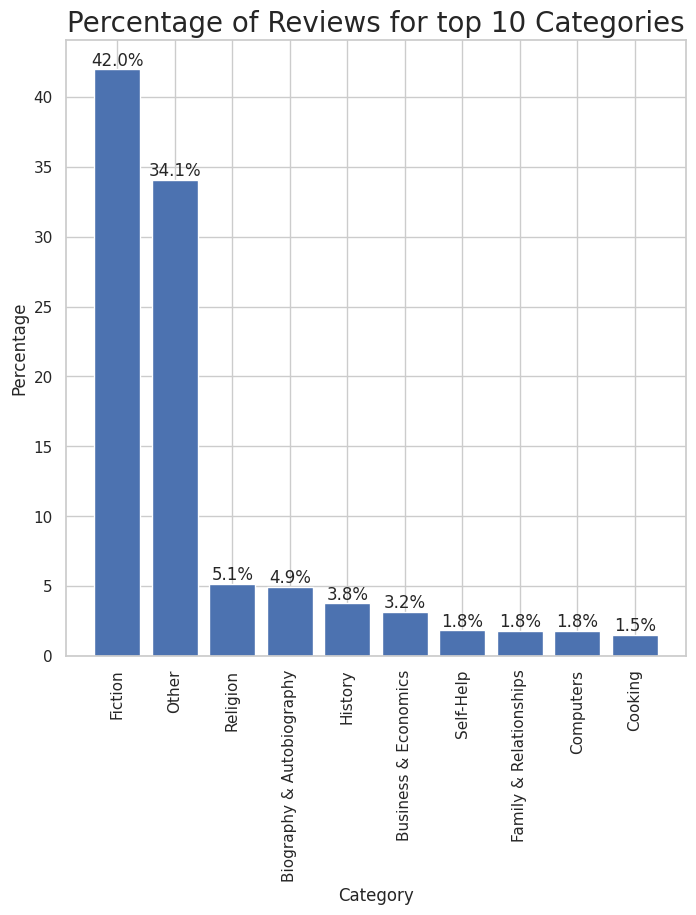

In [79]:
#Show a barplot by Percentages
category_percetage = df_train['categories'].value_counts(ascending=False)/df_train['categories'].value_counts(ascending=False).sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['categories'].value_counts(ascending=False).keys(), category_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Categories', fontsize = 20)
plt.show()

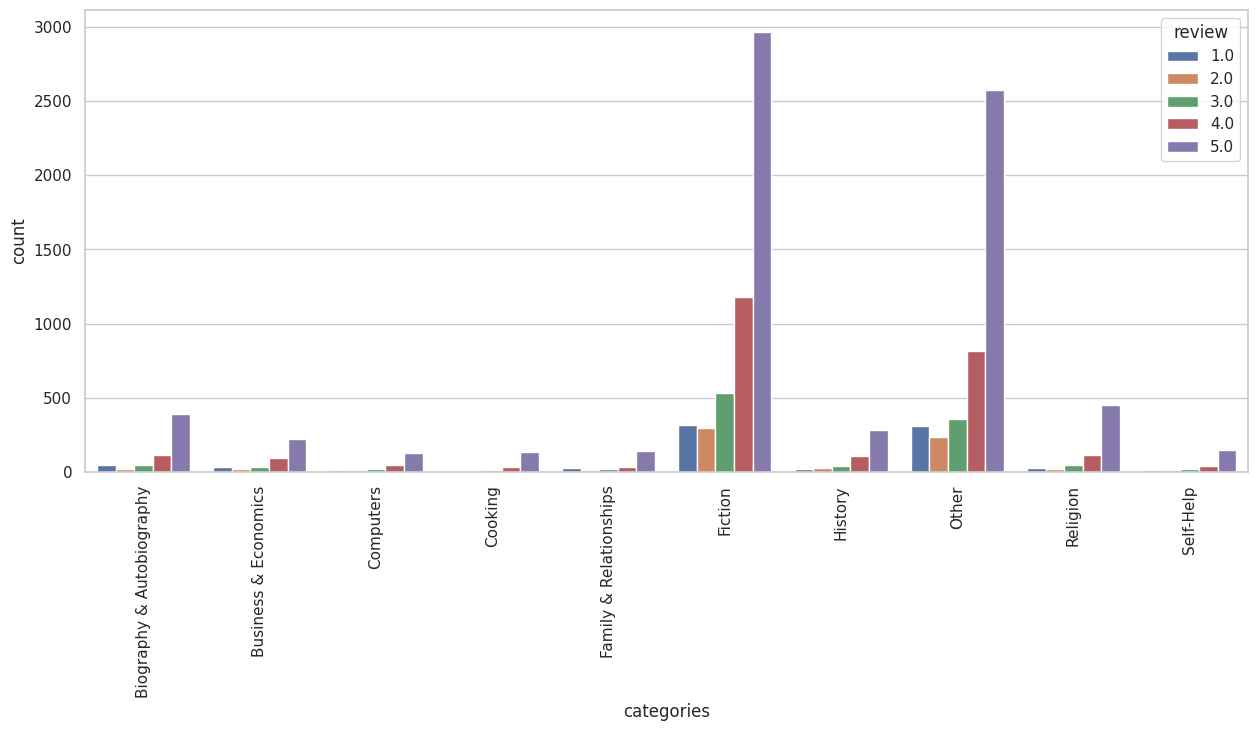

In [80]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_train, x = 'categories', hue='review')
plt.xticks(rotation=90)
plt.show()

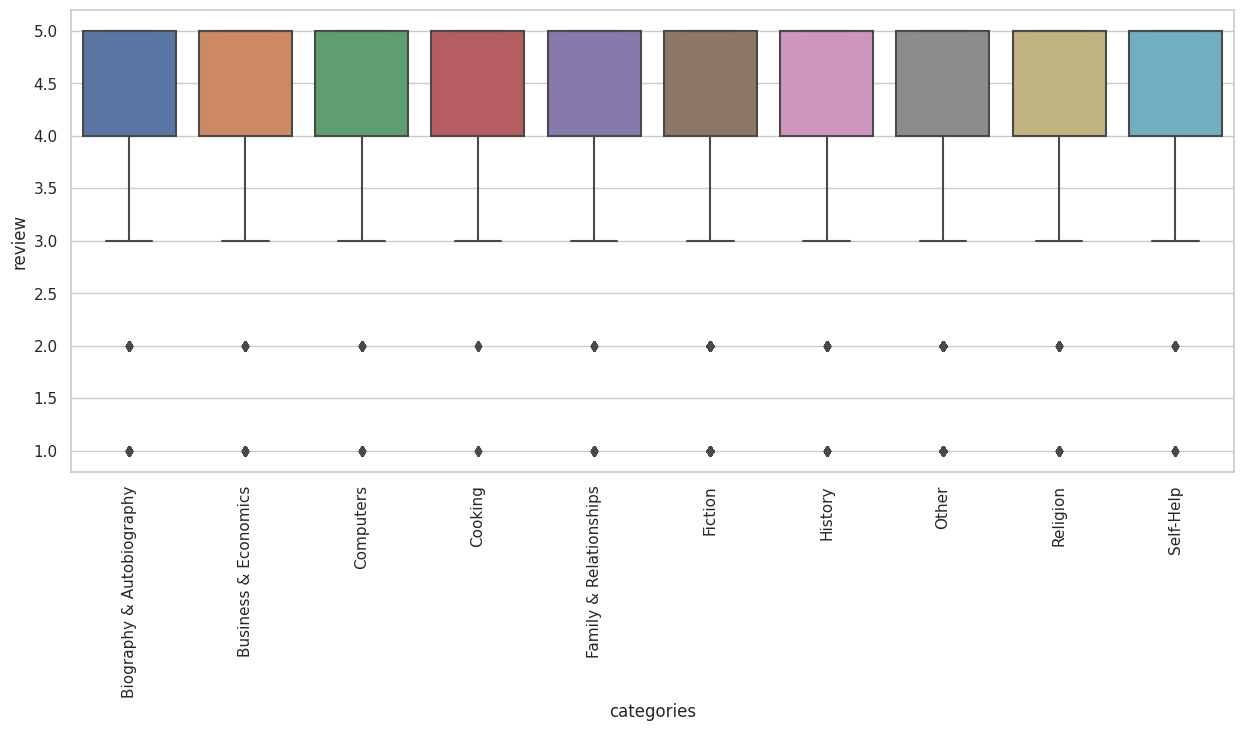

In [81]:
plt.figure(figsize=(15, 6))  # Set the figure size
sns.boxplot(x='categories', y='review', data=df_train)
plt.xticks(rotation=90)
plt.show()

In [82]:
df_train['categories'].unique()

['Fiction', 'History', 'Computers', 'Business & Economics', 'Other', 'Religion', 'Biography & Autobiography', 'Self-Help', 'Family & Relationships', 'Cooking']
Categories (10, object): ['Biography & Autobiography', 'Business & Economics', 'Computers', 'Cooking', ..., 'History', 'Other', 'Religion', 'Self-Help']

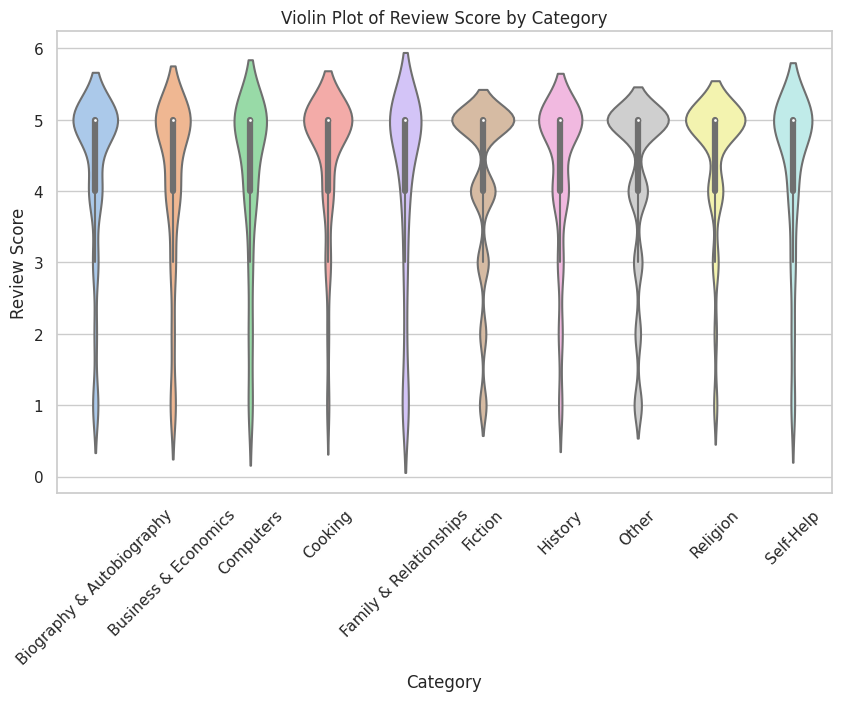

In [83]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='categories', y='review', data=df_train, palette='pastel')
plt.xlabel('Category')
plt.ylabel('Review Score')
plt.title('Violin Plot of Review Score by Category')
plt.xticks(rotation=45) 
plt.show()

### Key Findings for Categories:

- There are 10 different Categories in the Dataset.
- All of the reviewed categories contains reviews values in the 5 Categories [1, 2, 3, 4, 5]. All of the are biased to high review score.
- All categories but have lower quartile limit in Rating of 4 and minimum values of 3, but with outliers in 1 and 2 score reviews groups.
- 'Fiction' is most rated category. This category is biased to High review scores, having the mediana on 5. And the 25% quartile on 4.

## Published Year

In [84]:
pub_year = df_train[['published_year','review']]
pub_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12587 entries, 5508 to 2317
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   published_year  12587 non-null  int64  
 1   review          12587 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 295.0 KB


In [85]:
pub_year = pub_year.groupby('published_year')['review'].agg(['mean', 'count']).reset_index()
pub_year

published_year      mean  count
0            2004  4.141115   2296
1            2005  4.181425   2541
2            2006  4.055280   1610
3            2007  4.176471   1207
4            2008  4.250271    923
5            2009  4.261283   1263
6            2010  4.171039    953
7            2011  4.272588    653
8            2012  4.511628    989
9            2013  4.506579    152

In [86]:
pub_year['published_year'].describe().T

count      10.00000
mean     2008.50000
std         3.02765
min      2004.00000
25%      2006.25000
50%      2008.50000
75%      2010.75000
max      2013.00000
Name: published_year, dtype: float64

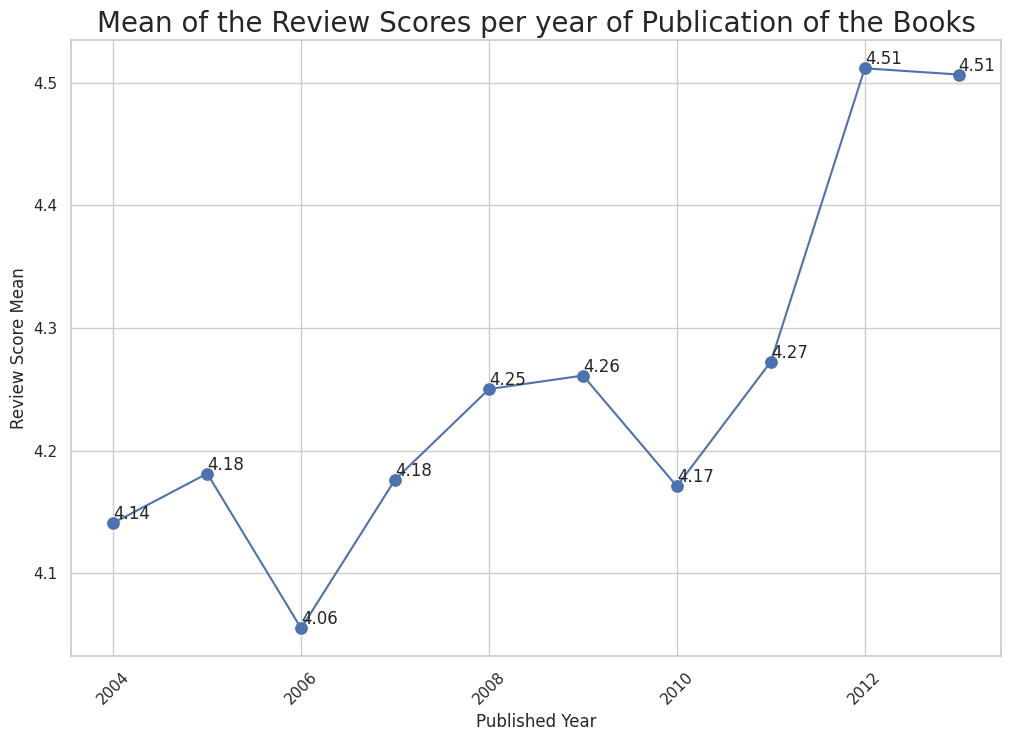

In [87]:
sns.set(style="whitegrid")  # Establecer el estilo de la cuadrícula
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura

# Crear el gráfico de líneas con Seaborn
sns.lineplot(x=pub_year['published_year'], y=pub_year['mean'], linestyle='-')

sns.scatterplot(x=pub_year['published_year'], y=pub_year['mean'], color='b', s=100)

for i, row in pub_year.iterrows():
    plt.text(row['published_year'], row['mean'], f'{row["mean"]:.2f}', ha='left', va='bottom')

# Personalizar etiquetas y título
plt.xlabel('Published Year')
plt.ylabel('Review Score Mean')
plt.title('Mean of the Review Scores per year of Publication of the Books', fontsize=20)
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

In [88]:
df_train[(df_train['published_year']>=2004) & ((df_train['published_year']>=2010))]['categories'].value_counts()

categories
Fiction                      1564
Other                         732
Religion                      128
Biography & Autobiography     109
History                        76
Business & Economics           62
Family & Relationships         29
Self-Help                      23
Cooking                        20
Computers                       4
Name: count, dtype: int64

In [89]:
df_train[((df_train['published_year']>2010))]['categories'].value_counts()

categories
Fiction                      1074
Other                         475
Religion                       72
History                        57
Biography & Autobiography      56
Business & Economics           18
Family & Relationships         18
Self-Help                      13
Cooking                         7
Computers                       4
Name: count, dtype: int64

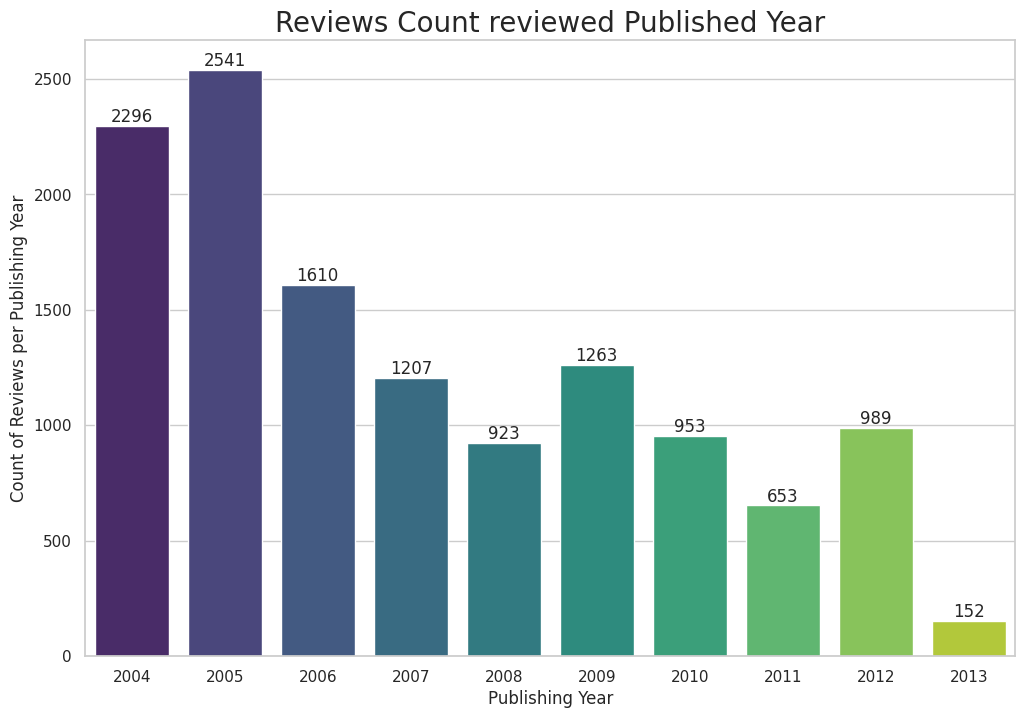

In [90]:

sns.set(style="whitegrid")  
plt.figure(figsize=(12, 8))  

ax = sns.barplot(x=pub_year['published_year'], y=pub_year['count'], palette="viridis")

for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.title('Reviews Count reviewed Published Year', fontsize=20)
plt.ylabel('Count of Reviews per Publishing Year')
plt.xlabel('Publishing Year')

plt.show()

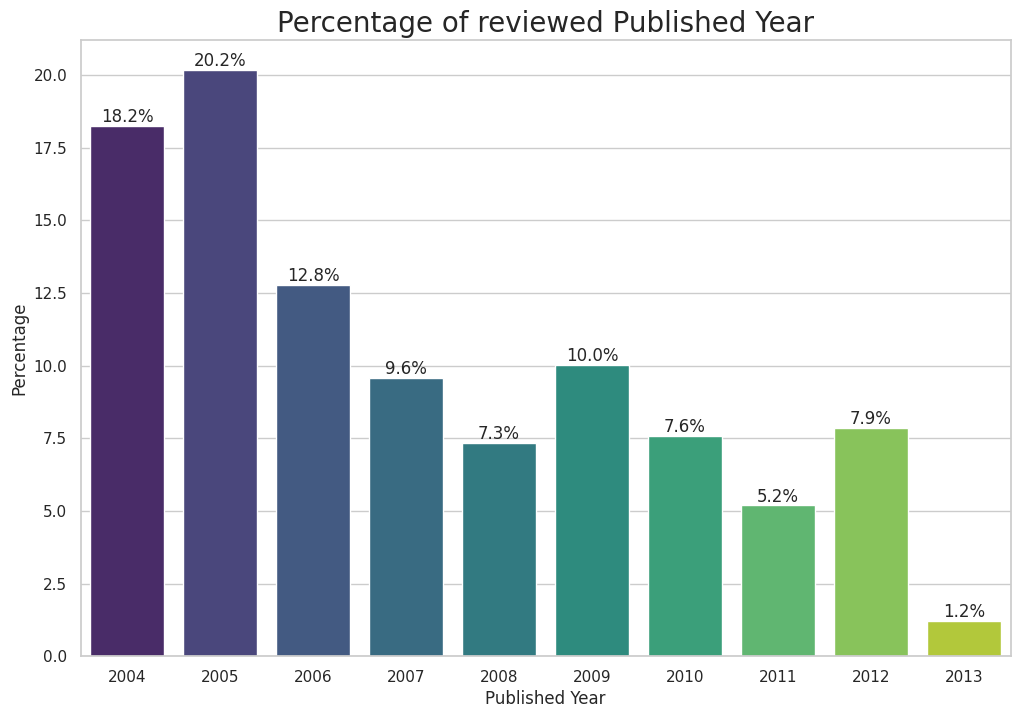

In [91]:
pub_year_percentage = (pub_year['count'] / pub_year['count'].sum()) * 100

sns.set(style="whitegrid")  # Establecer el estilo de la cuadrícula
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura

# Crear el gráfico de barras con Seaborn
ax = sns.barplot(x=pub_year['published_year'], y=pub_year_percentage, palette="viridis")

# Agregar etiquetas de porcentaje en las barras
for bar, percentage in zip(ax.patches, pub_year_percentage):
    ax.annotate(f'{percentage:.1f}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

# Personalizar etiquetas y título
plt.xlabel('Published Year')
plt.ylabel('Percentage')
plt.title('Percentage of reviewed Published Year', fontsize=20)

# Mostrar el gráfico
plt.show()

In [92]:
import plotly.express as px

fig = px.box(df_train, x='published_year', y='review')

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Boxplot of Reviews by Published Year',
    title_x=0.5,
    xaxis_title='Published Year',
    yaxis_title='Review',
    xaxis=dict(
        tickangle=-45,        
    )
)

# Mostrar el gráfico interactivo
fig.show()

In [93]:
df_train[['published_year', 'review']].corr().style.background_gradient(cmap='Blues')

### Key Findings for Published Year

- All of the reviews for Published years, are biased to high scores. Having the quartile 25% above 4.
- Books published during the initial years of the dataset, namely 2004, 2005, and 2006, encompass 51.2% of the total dataset reviews. These years represent the period of highest activity.
- The average review score remains consistently between 4 and 4.5 across all the years of publication in the dataset


## Helpfulness

In [94]:
df_train.sample(2)

categories publisher  published_year  review_year  \
13086                 Other     Other            2007         2008   
7332   Business & Economics     Other            2008         2009   

       helpfulness                                         text_clean  \
13086     0.347826  book nothing recommend silly contrived charact...   
7332      1.000000  textbook give basic summary marketing course f...   

       compound_sentiment  text_complexity  word_count  review  
13086             -0.3531              9.4          90     1.0  
7332               0.9087              8.7          30     4.0

In [95]:
df_train['helpfulness'].describe().T

count    12587.000000
mean         0.819440
std          0.315516
min          0.000000
25%          0.750000
50%          1.000000
75%          1.000000
max          1.000000
Name: helpfulness, dtype: float64

In [96]:
#Create a box plot to check for outliers, median and quartiles
fig = px.box(df_train, y='helpfulness')

fig.update_xaxes(title_text='')
fig.update_layout(
    title='Boxplot for Helpfulness Feature',
    title_x=0.5        
)

fig.show()

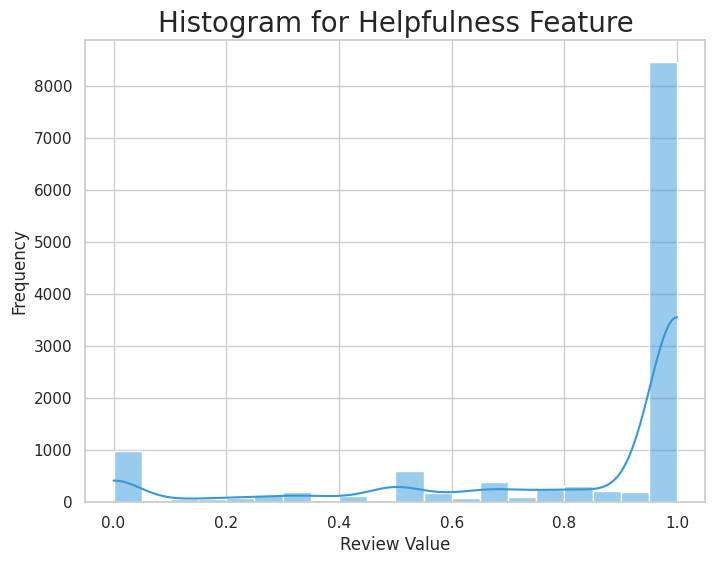

In [97]:
plt.figure(figsize=(8, 6))
sns.histplot(df_train['helpfulness'], bins=20, kde=True, color='#3498db')
plt.xlabel("Review Value")
plt.ylabel("Frequency")
plt.title("Histogram for Helpfulness Feature", fontsize=20)
plt.show()

In [99]:
df_train['helpfulness'].describe().T

count    12587.000000
mean         0.819440
std          0.315516
min          0.000000
25%          0.750000
50%          1.000000
75%          1.000000
max          1.000000
Name: helpfulness, dtype: float64

In [113]:
#Correlation Analysis 
df_train[['helpfulness','review']].corr().style.background_gradient(cmap='Blues')

In [114]:

# Create an interactive box plot using Plotly
fig = px.box(df_train, x='review', y='helpfulness')

fig.update_layout(
    title='Box Plot of Review vs Helpfulness',
    xaxis_title='Review',
    yaxis_title='Helpfulness',
    title_x=0.5
)

# Show the interactive plot
fig.show()

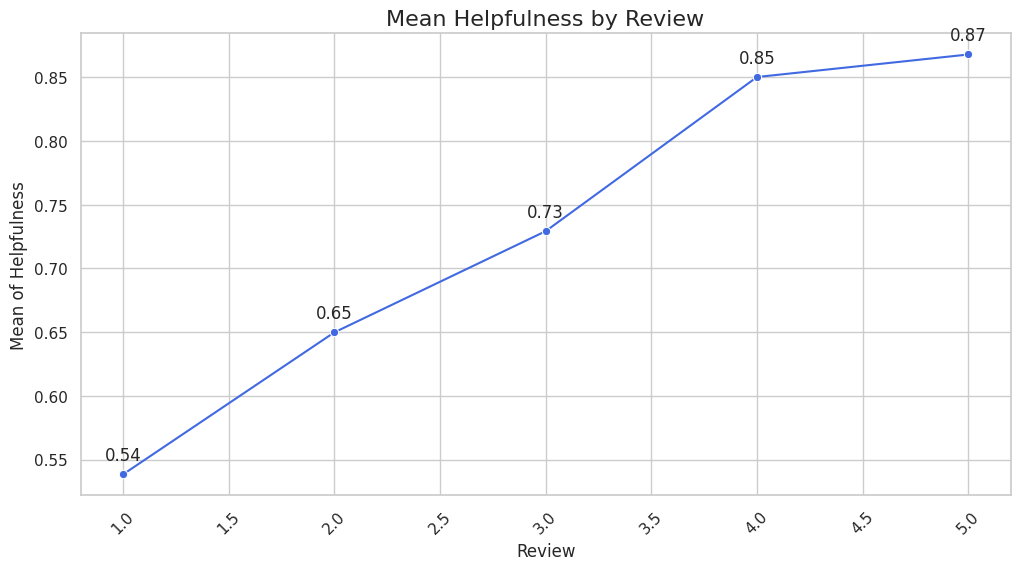

In [115]:
helpfulness_by_review = df_train.groupby('review')['helpfulness'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=helpfulness_by_review.index, y=helpfulness_by_review.values, marker='o', linestyle='-', color='royalblue')
plt.xlabel('Review')
plt.ylabel('Mean of Helpfulness')
plt.title('Mean Helpfulness by Review', fontsize=16)
plt.grid(True)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels to each point
for x, y in zip(helpfulness_by_review.index, helpfulness_by_review.values):
    plt.annotate(f'{y:.2f}', (x, y), textcoords='offset points', xytext=(0,10), ha='center')

plt.show()

<Figure size 1200x600 with 0 Axes>

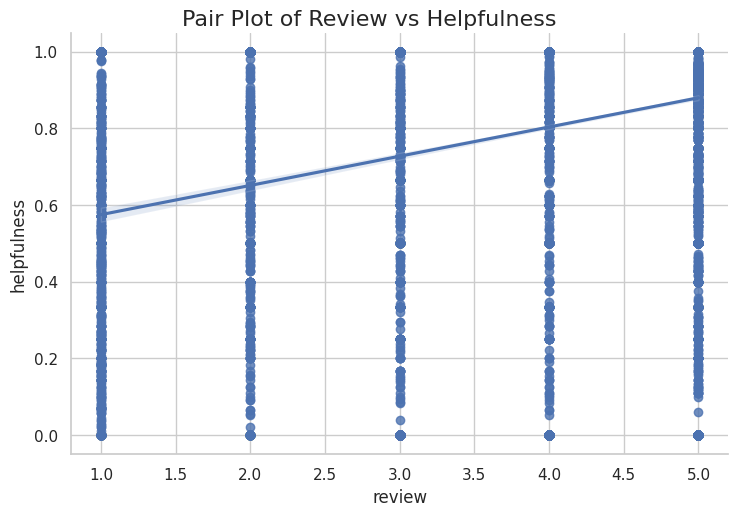

In [116]:
plt.figure(figsize=(12, 6))
sns.pairplot(df_train, x_vars=['review'], y_vars=['helpfulness'], kind='reg', height=5, aspect=1.5)
plt.suptitle('Pair Plot of Review vs Helpfulness', y=1.02, fontsize=16)
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

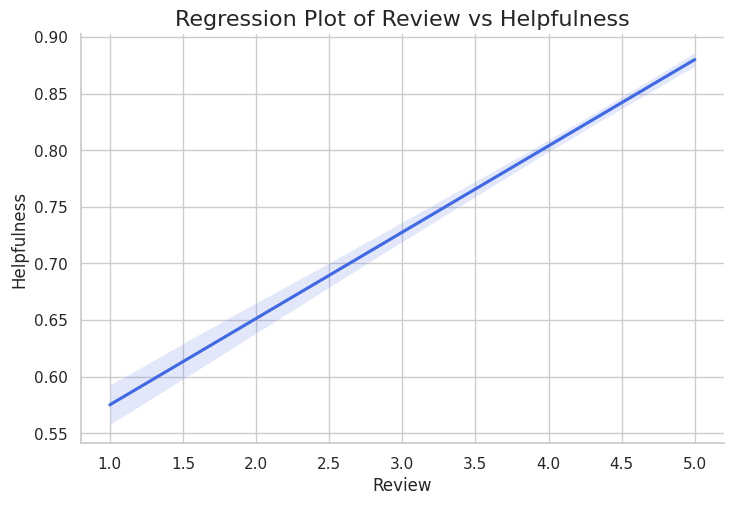

In [117]:
plt.figure(figsize=(12, 6))
sns.lmplot(x='review', y='helpfulness', data=df_train, height=5, aspect=1.5, scatter=False, line_kws={"color": "royalblue"})
plt.xlabel('Review')
plt.ylabel('Helpfulness')
plt.title('Regression Plot of Review vs Helpfulness', fontsize=16)
plt.grid(True)
plt.show()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in arcsin



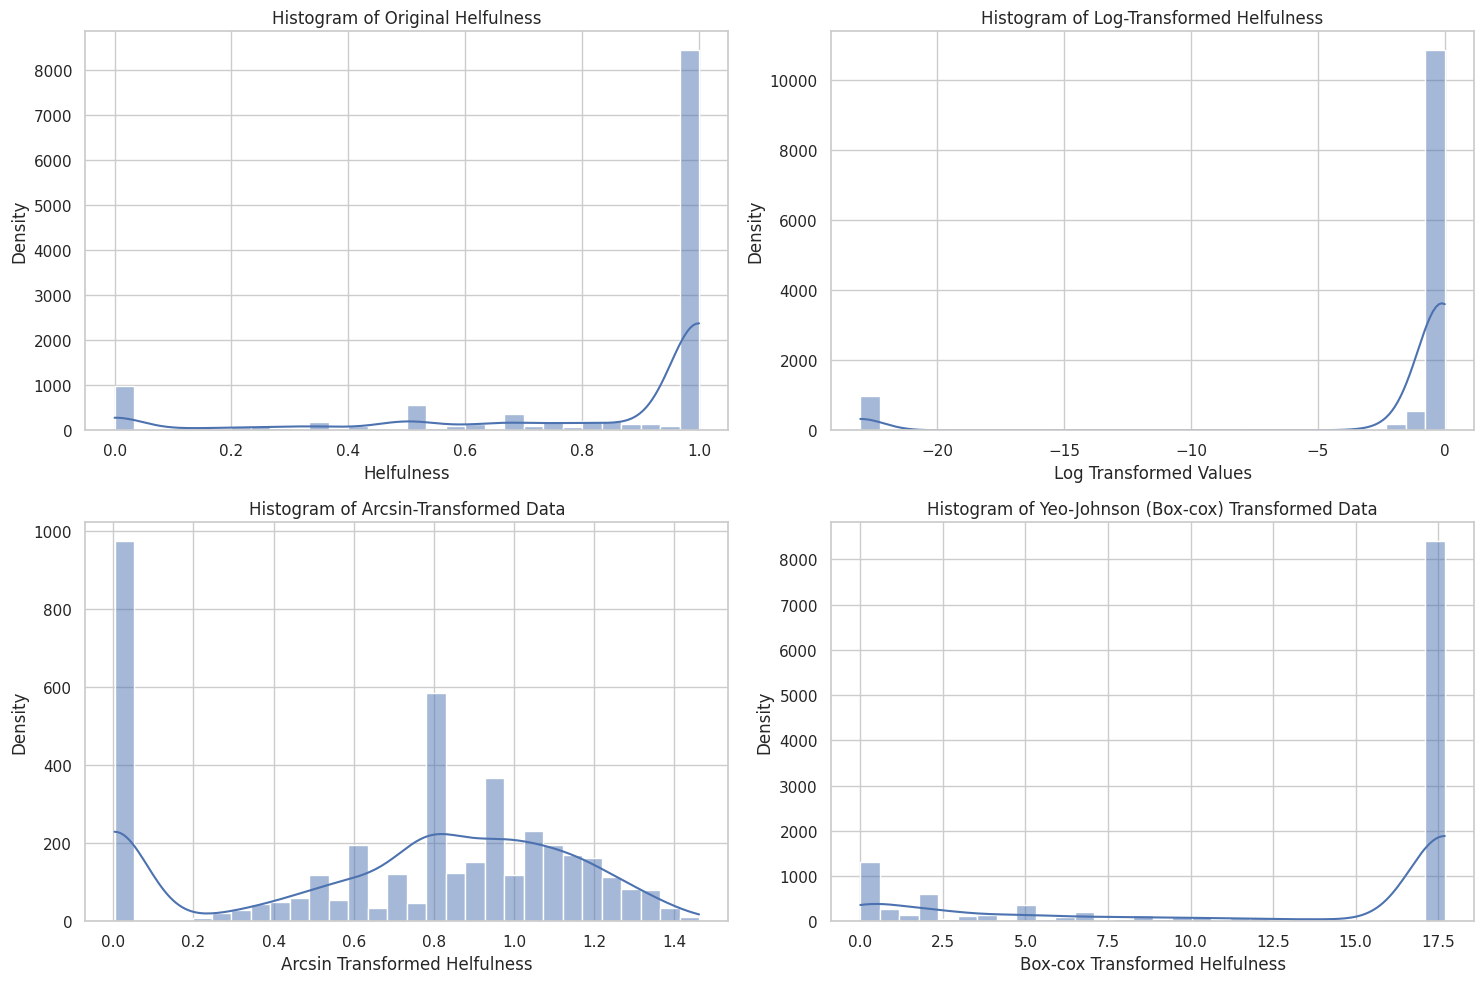

In [128]:
# Log transformation can help to reduce the bias towards to 1 
small_constant_log = 1e-10
helpfulness_log = np.log(df_train['helpfulness'] + small_constant_log)

# Arcsin Transformation
small_constant_arcsin = 1e-5
helpfulness_arcsin = np.arcsin(np.sqrt(df_train['helpfulness'] + small_constant_arcsin))

#Box-Cox Transformation
helpfulness_box_cox, lambda_bestfit = stats.yeojohnson(df_train['helpfulness'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.set(style="whitegrid")

sns.histplot(df_train['helpfulness'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_xlabel('Helfulness')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title('Histogram of Original Helfulness')

sns.histplot(helpfulness_log, bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_xlabel('Log Transformed Values')
axes[0,1].set_ylabel('Density')
axes[0,1].set_title('Histogram of Log-Transformed Helfulness')

# Create a histogram plot for the arcsin-transformed data
sns.histplot(helpfulness_arcsin, bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_xlabel('Arcsin Transformed Helfulness')
axes[1,0].set_ylabel('Density')
axes[1,0].set_title('Histogram of Arcsin-Transformed Data')


# Create a histogram plot for the arcsin-transformed data
sns.histplot(helpfulness_box_cox, bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_xlabel('Box-cox Transformed Helfulness')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title('Histogram of Yeo-Johnson (Box-cox) Transformed Data')

plt.tight_layout()
plt.show()

In [119]:
df_train['helpfulness_arcsin'] = np.arcsin(np.sqrt(df_train['helpfulness'] + small_constant_arcsin))

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in arcsin



In [125]:
#Create a box plot to check for outliers, median and quartiles
fig = px.box(helpfulness_box_cox)

fig.update_xaxes(title_text='')
fig.update_layout(
    title='Boxplot for Helpfulness Acrsing Transformed Feature',
    title_x=0.5        
)

fig.show()

In [126]:

# Create an interactive box plot using Plotly
fig = px.box(x=df_train['review'], y=helpfulness_arcsin)

fig.update_layout(
    title='Box Plot of Review vs Transformed Arcsin Helpfulness',
    xaxis_title='Review',
    yaxis_title='Helpfulness',
    title_x=0.5
)

# Show the interactive plot
fig.show()

### Key Findings for helpfulness

- Reviews with a high review score are found more helpfull than reviews with low review score.
- Mean of the helpfulness and review have a linear relationship.
- Helpfulness vs review regression plot confirms the linear relation between the variables.

## Review_Year

In [52]:
rev_year = df_train[['review_year','review']]
rev_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11800 entries, 13103 to 9690
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_year  11800 non-null  int64  
 1   review       11800 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 276.6 KB


In [53]:
rev_year = rev_year.groupby('review_year')['review'].agg(['mean', 'count']).reset_index()
rev_year

review_year      mean  count
0         2004  4.074000    500
1         2005  4.130693   1010
2         2006  4.065177   1074
3         2007  4.190840    917
4         2008  4.099143    817
5         2009  4.095548    921
6         2010  4.147495   1078
7         2011  4.138011   1297
8         2012  4.297454   2592
9         2013  4.449812   1594

In [54]:
rev_year['review_year'].describe().T

count      10.00000
mean     2008.50000
std         3.02765
min      2004.00000
25%      2006.25000
50%      2008.50000
75%      2010.75000
max      2013.00000
Name: review_year, dtype: float64

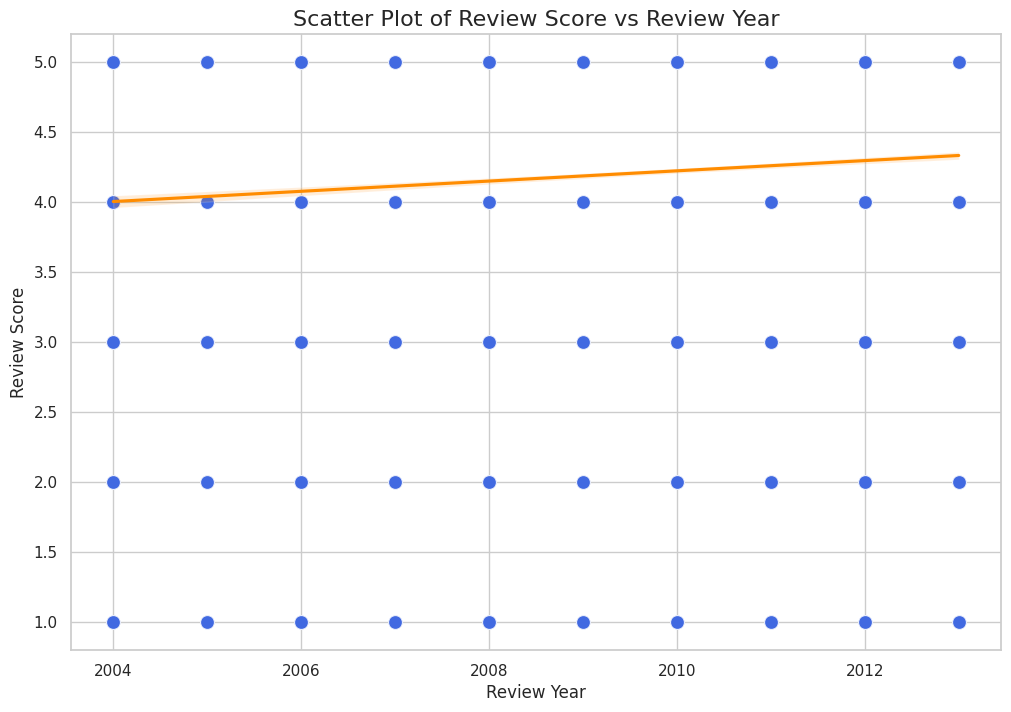

In [55]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='review_year', y='review', data=df_all_data_processed, color='royalblue', alpha=0.7, edgecolor='w', s=100)
sns.regplot(x='review_year', y='review', data=df_all_data_processed, scatter=False, color='darkorange')
plt.xlabel('Review Year')
plt.ylabel('Review Score')
plt.title('Scatter Plot of Review Score vs Review Year', fontsize=16)
plt.grid(True)
plt.show()

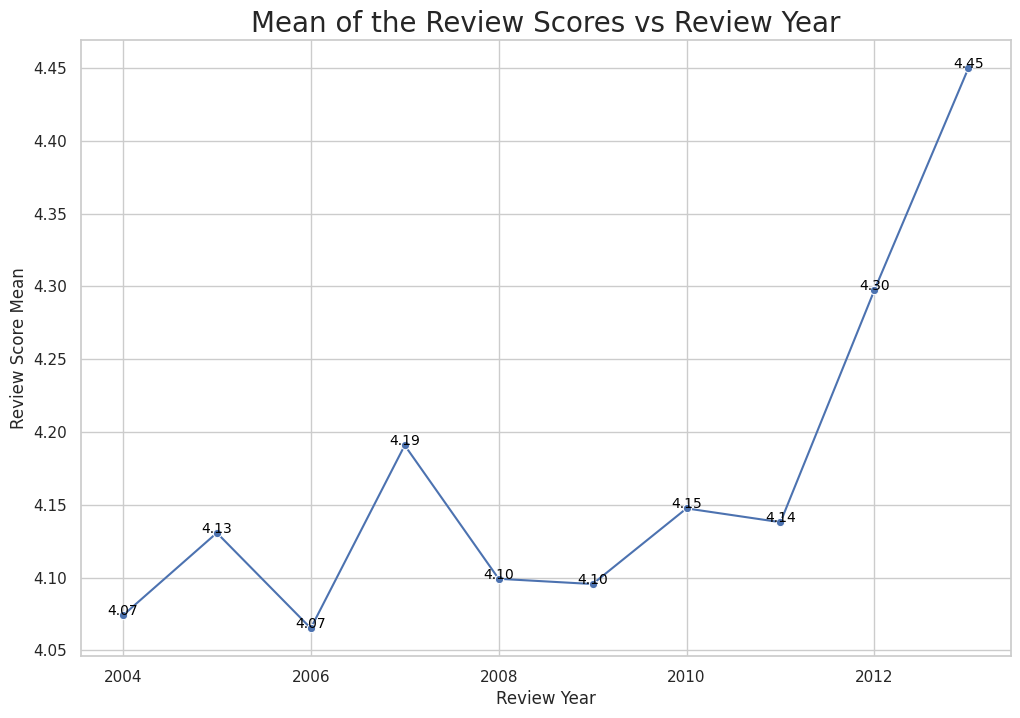

In [56]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=rev_year, x='review_year', y='mean', marker='o', linestyle='-')
plt.xlabel('Review Year')
plt.ylabel('Review Score Mean')
plt.title('Mean of the Review Scores vs Review Year', fontsize=20)
plt.grid(True)

# Add labels to the points
for line in range(0, rev_year.shape[0]):
    ax.text(rev_year['review_year'][line], rev_year['mean'][line], f'{rev_year["mean"][line]:.2f}', horizontalalignment='center', fontsize=10, color='black')

plt.show()

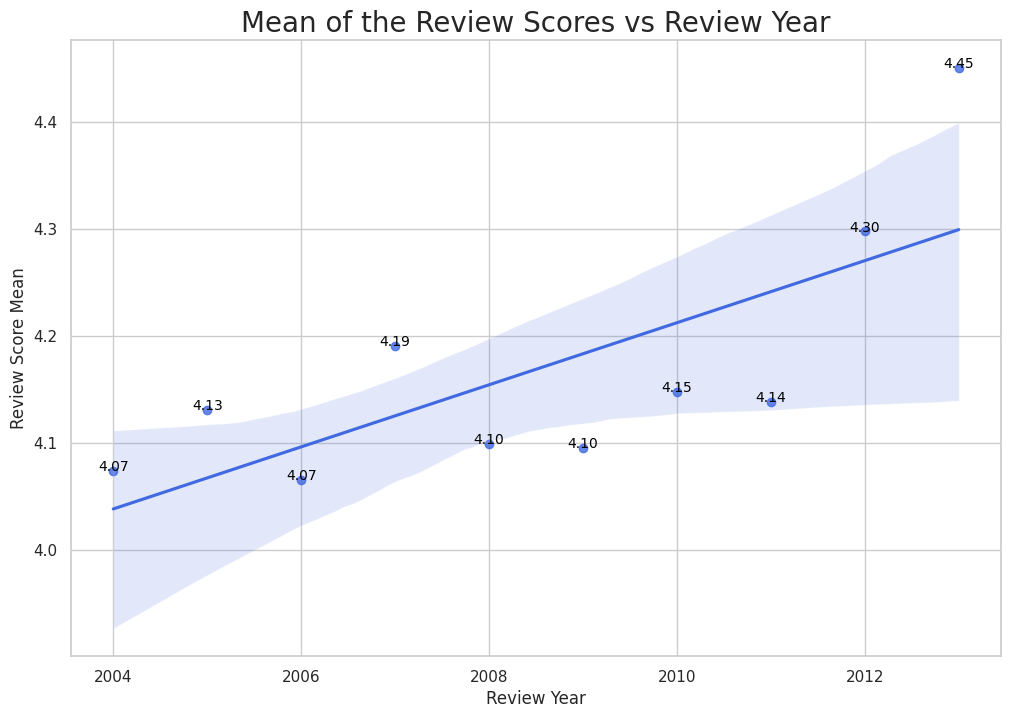

In [57]:
plt.figure(figsize=(12, 8))
ax = sns.regplot(data=rev_year, x='review_year', y='mean', color='royalblue')
plt.xlabel('Review Year')
plt.ylabel('Review Score Mean')
plt.title('Mean of the Review Scores vs Review Year', fontsize=20)
plt.grid(True)

# Add labels to the points
for line in range(0, rev_year.shape[0]):
    ax.text(rev_year['review_year'][line], rev_year['mean'][line], f'{rev_year["mean"][line]:.2f}', horizontalalignment='center', fontsize=10, color='black')

plt.show()

In [58]:
df_train[['review_year', 'review']].corr().style.background_gradient(cmap='Blues')

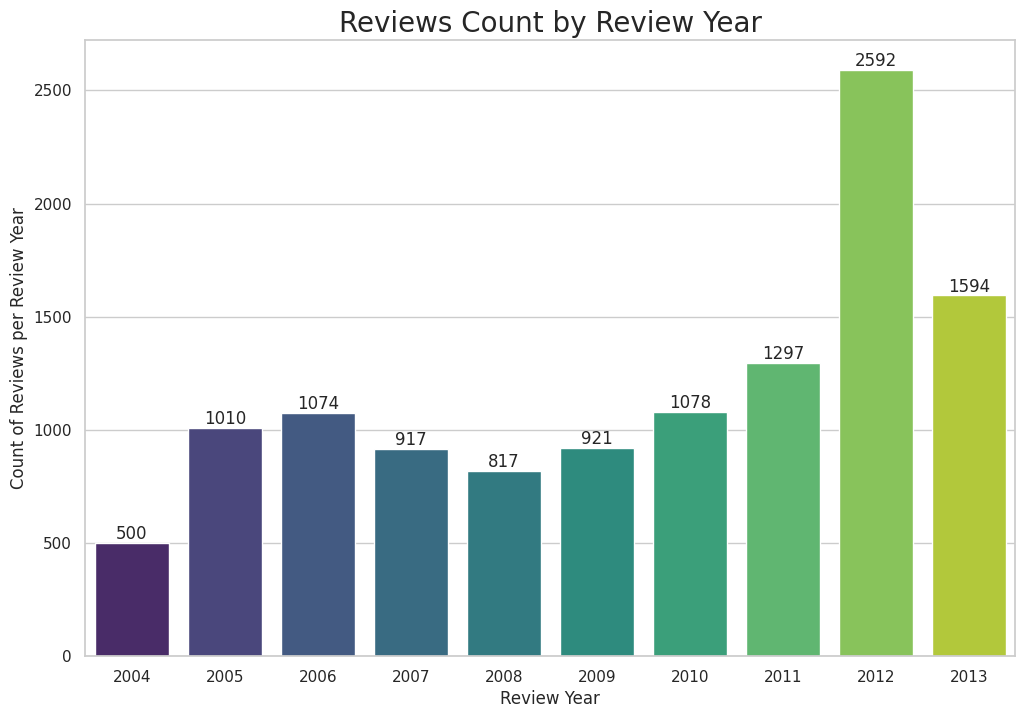

In [59]:
sns.set(style="whitegrid")  
plt.figure(figsize=(12, 8))  

ax = sns.barplot(x=rev_year['review_year'], y=rev_year['count'], palette="viridis")

for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.title('Reviews Count by Review Year', fontsize=20)
plt.ylabel('Count of Reviews per Review Year')
plt.xlabel('Review Year')

plt.show()

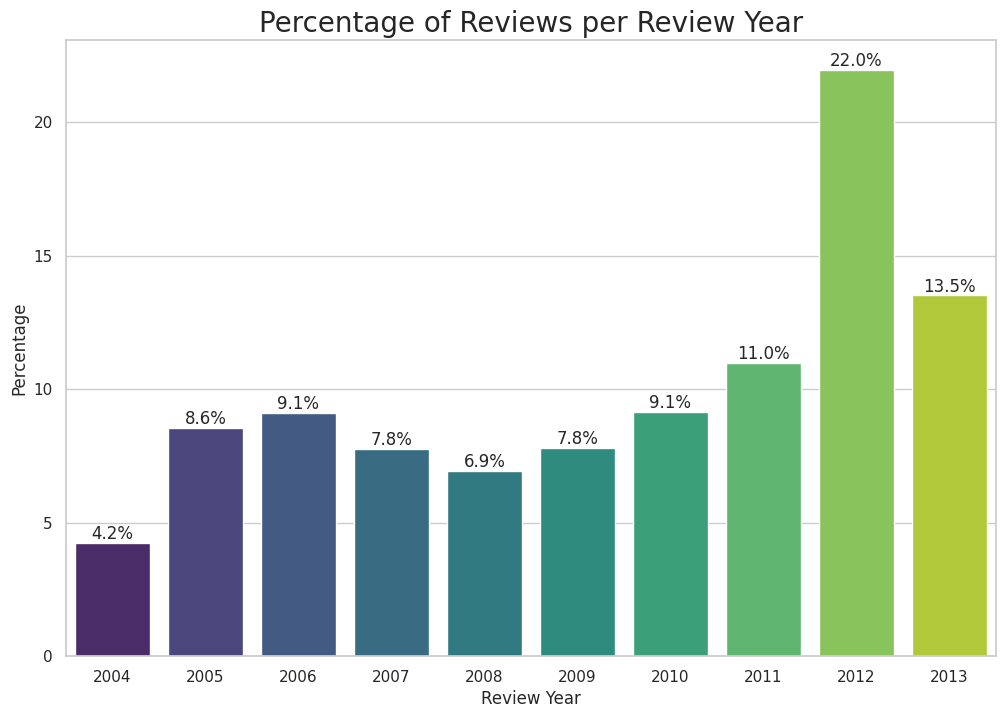

In [60]:
rev_year_percentage = (rev_year['count'] / rev_year['count'].sum()) * 100

sns.set(style="whitegrid")  # Establecer el estilo de la cuadrícula
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura

# Crear el gráfico de barras con Seaborn
ax = sns.barplot(x=rev_year['review_year'], y=rev_year_percentage, palette="viridis")

# Agregar etiquetas de porcentaje en las barras
for bar, percentage in zip(ax.patches, rev_year_percentage):
    ax.annotate(f'{percentage:.1f}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

# Personalizar etiquetas y título
plt.xlabel('Review Year')
plt.ylabel('Percentage')
plt.title('Percentage of Reviews per Review Year', fontsize=20)

# Mostrar el gráfico
plt.show()

In [61]:
fig = px.box(df_train, x='review_year', y='review')

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Boxplot of Review Score by Review Year',
    title_x=0.5,
    xaxis_title='Review Year',
    yaxis_title='Review',
    xaxis=dict(
        tickangle=-45,        
    )
)

# Mostrar el gráfico interactivo
fig.show()

### Key Findings for Review Year
- The years with the highest volume of reviews for Amazon Books are 2011, 2012, and 2013.
- The review scores for all years tend to skew towards higher ratings, with the 25th percentile (Q1) above 4 and the median at 5. The only exception is in 2008, where the 25th percentile (Q1) is at 3.

## Publisher

In [62]:
df_train.sample(2)

categories                  publisher  published_year  \
11429                    Fiction               Random House            2008   
239    Biography & Autobiography  Houghton Mifflin Harcourt            2007   

       review_year  helpfulness  \
11429         2011          1.0   
239           2007          1.0   

                                              text_clean  compound_sentiment  \
11429  many people day worry society turning nightmar...              0.4588   
239    author jill fredston worked avalanche preventi...              0.6908   

       text_complexity  word_count  review  
11429              6.4          23     4.0  
239               20.1          46     5.0

In [63]:
print(f'Total of Publishers: {len(df_train["publisher"].unique())}')

Total of Publishers: 10


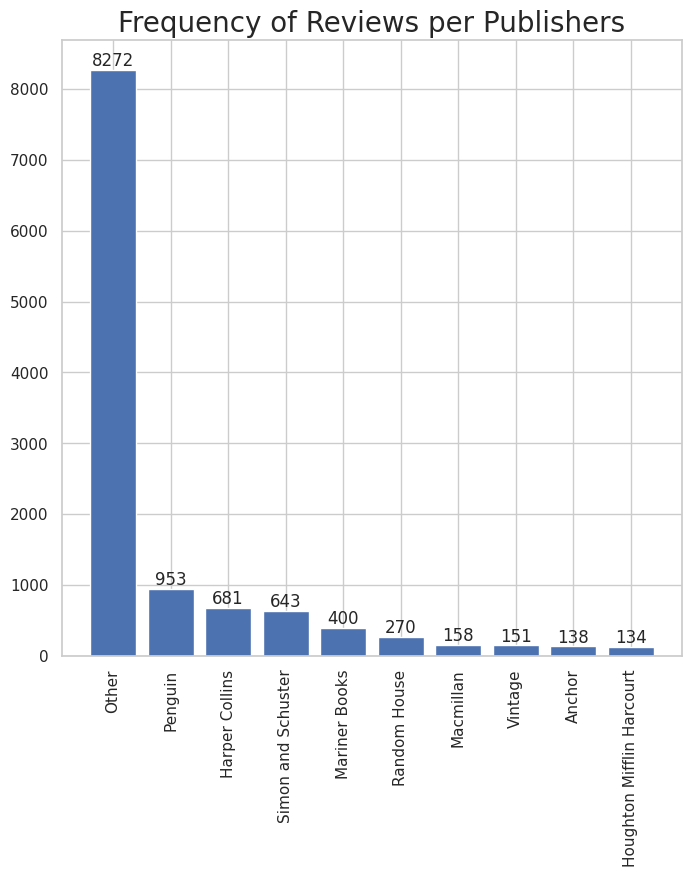

In [64]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['publisher'].value_counts(ascending = False).keys(), df_train['publisher'].value_counts(ascending = False))
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews per Publishers', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

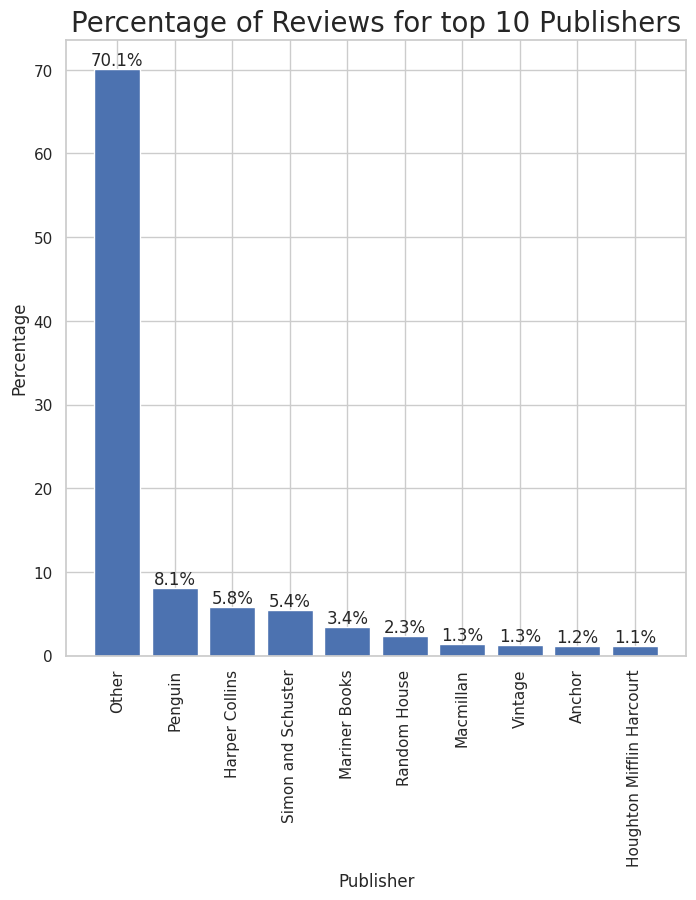

In [65]:
#Show a barplot by Percentages
author_percetage = df_train['publisher'].value_counts(ascending = False)/df_train['publisher'].value_counts(ascending = False).sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['publisher'].value_counts(ascending = False).keys(), author_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Publisher')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Publishers', fontsize = 20)
plt.show()


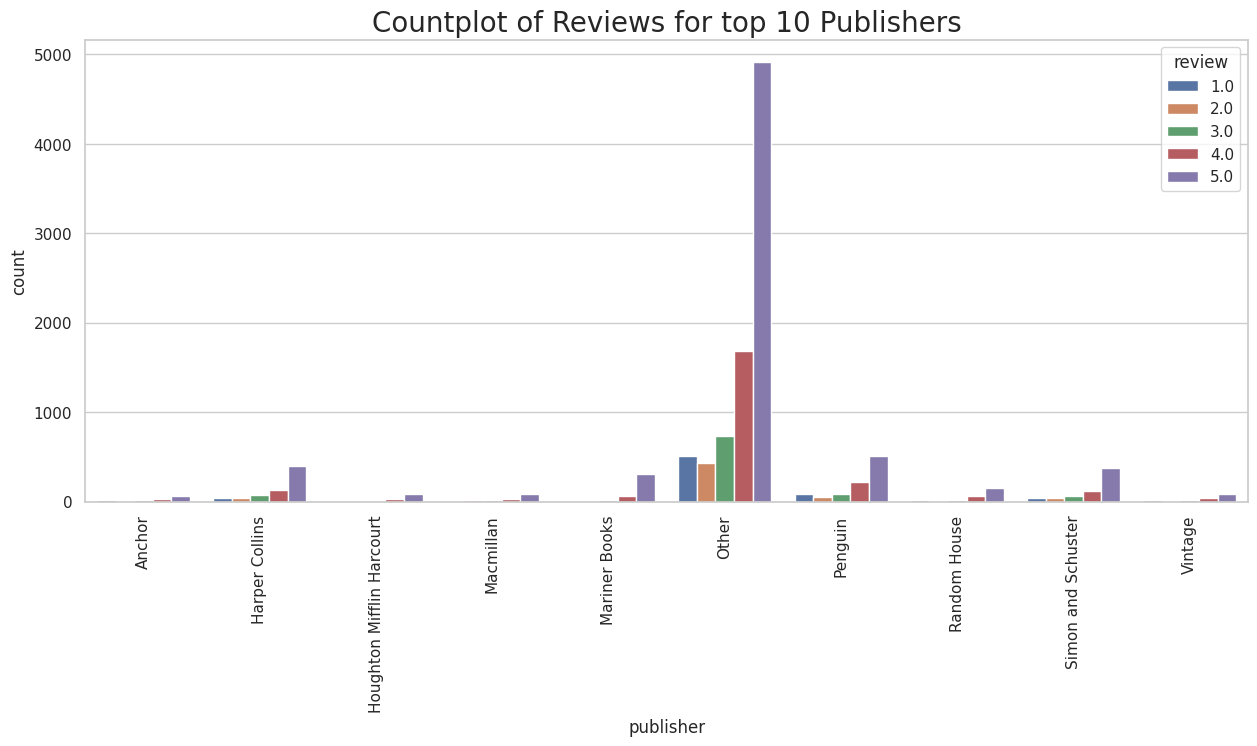

In [66]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_train, x = 'publisher', hue='review')
plt.title('Countplot of Reviews for top 10 Publishers', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [67]:
fig = px.box(df_train, x='publisher', y='review')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
    title='Interactive Box Plot of Review by Publisher',
    xaxis_title='Publisher',
    yaxis_title='Review'
)
fig.show()

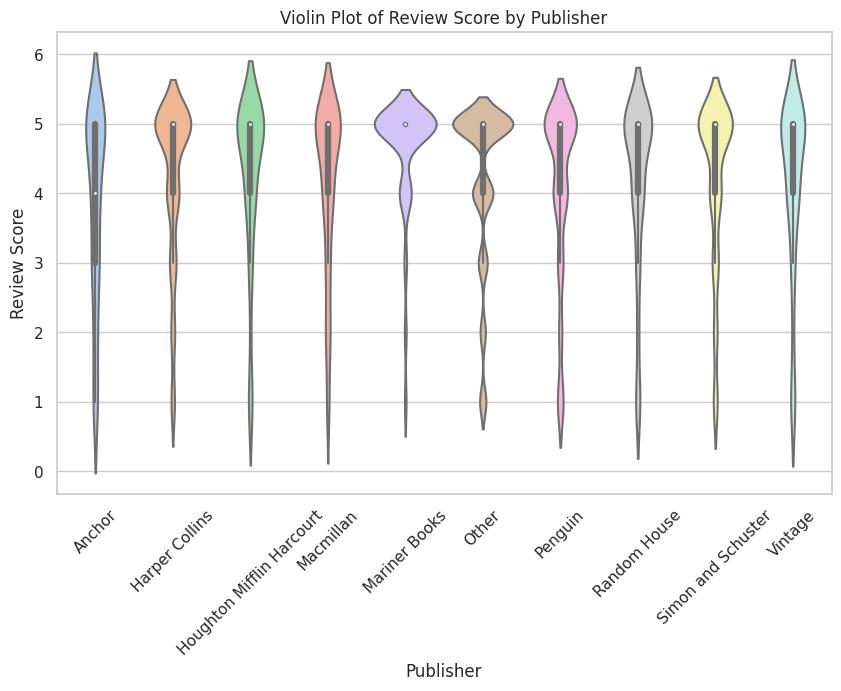

In [68]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='publisher', y='review', data=df_train, palette='pastel')
plt.xlabel('Publisher')
plt.ylabel('Review Score')
plt.title('Violin Plot of Review Score by Publisher')
plt.xticks(rotation=45) 
plt.show()


### Key Findings for Publisher

- All of the Top Publishers have a Review Score biased to high values. All of them but Macmillan have the 25% percentile above 4. Having the median value and 75% percentile on 5. 
- All of the Publishers have values on the 5 possible review scores. As it contains valid variability, this feature is kept.

## Compound Sentiment

This variable is the result of applying vader lexicon with NLTK library to the cleaned text review from the Dataset.

In [69]:
df_train.sample(2)

categories                  publisher  published_year  review_year  \
596     Fiction  Houghton Mifflin Harcourt            2004         2005   
3987   Religion                      Other            2006         2006   

      helpfulness                                         text_clean  \
596          0.75  first heard book thought huge potential huge f...   
3987         1.00  read book day work trouble keeping mind day li...   

      compound_sentiment  text_complexity  word_count  review  
596               0.9786              7.2         156     1.0  
3987              0.5994              4.3          17     5.0

In [70]:
df_train['compound_sentiment'].describe().T

count    11800.000000
mean         0.626216
std          0.513545
min         -0.998500
25%          0.557400
50%          0.855500
75%          0.951300
max          0.999800
Name: compound_sentiment, dtype: float64

compound_sentiment range goes from -1 to 1. As more near is the value to 1, more positive is the sentiment extracted from the text. And as more near to -1 is the value,
more negative is the sentiment predicted from the value.

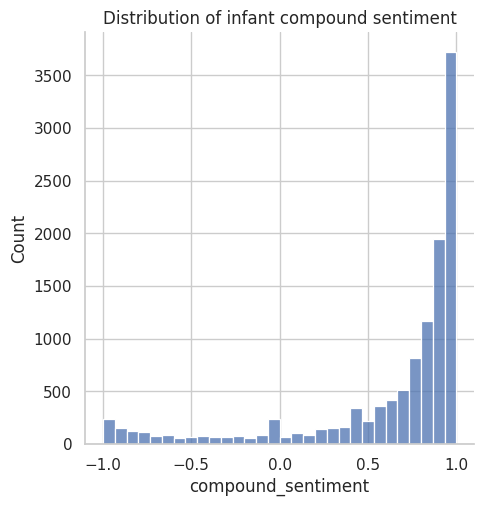

In [71]:
sns.displot(df_train['compound_sentiment'], bins=30)

plt.title('Distribution of infant compound sentiment')

plt.show()

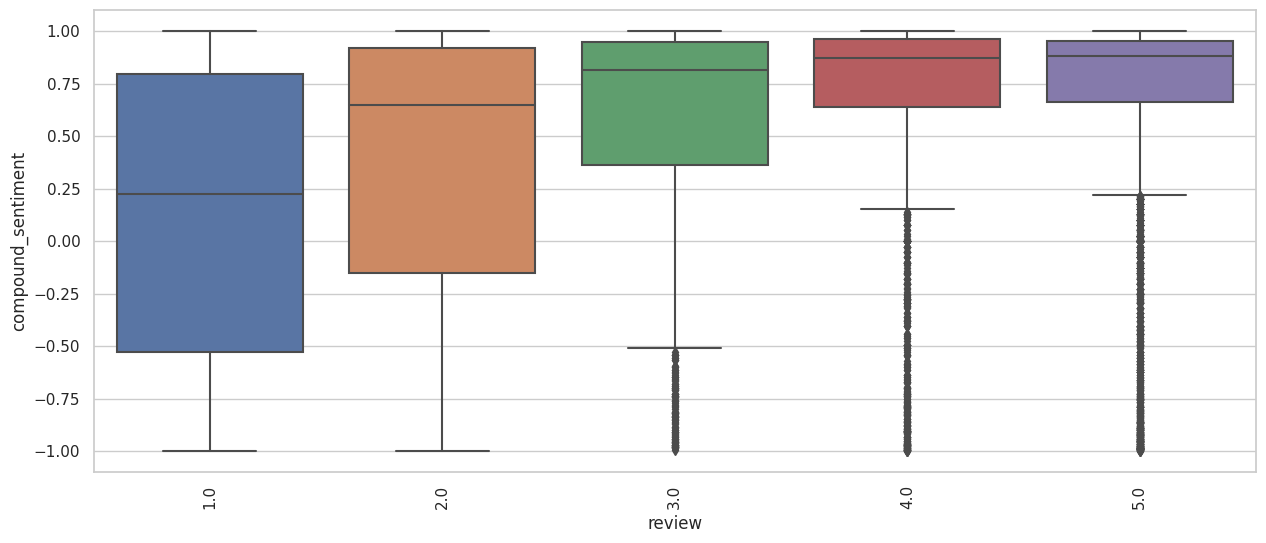

In [72]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(x='review', y='compound_sentiment', data=df_train)
plt.xticks(rotation=90)
plt.show()

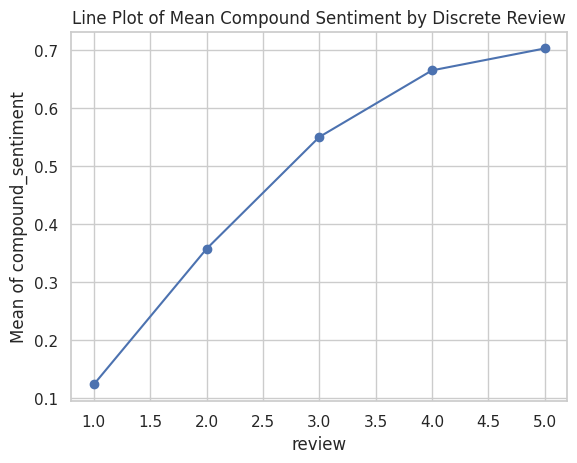

In [73]:
mean_by_review = df_train.groupby('review')['compound_sentiment'].mean()
mean_by_review.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('review')
plt.ylabel('Mean of compound_sentiment')
plt.title('Line Plot of Mean Compound Sentiment by Discrete Review')
plt.grid(True)
plt.show()

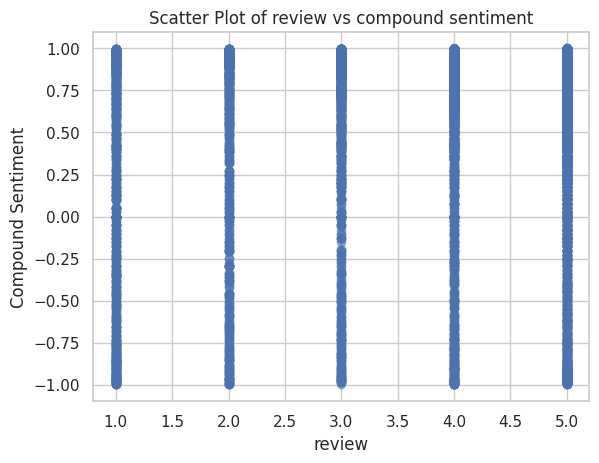

In [74]:
plt.scatter(df_train['review'], df_train['compound_sentiment'], alpha=0.5)
plt.xlabel('review')
plt.ylabel('Compound Sentiment')
plt.title('Scatter Plot of review vs compound sentiment')
plt.show()

In [75]:
df_train[['compound_sentiment', 'review']].corr().style.background_gradient(cmap='Blues')

### Key Findings for Compound Sentiment

- From the Distribution Plot, it is visible that Compound Sentiment Feature is biased to high levels/positive levels.
- The Boxplot figure shows the relation between review and compound sentiment. For High score reviews, the Compound sentiments tends to increase and be positive. And for Low Review Scores, the sentiment tends to be negative. This can explain the first bullet, because the dataset contains more entries with High Score Values, the positive Compound sentiment will increse.
- The line plot confirms the relationship between review and compound sentiment, plotting the mean of the compound sentiment for each review score. There is a positive relation. When review tends to be high, compound sentiment tends to be 1. 

## Text Complexity

 Flesch-Kincaid Grade Level readability score was used to estimate the readability and complexity of the text based on factors like sentence length and word difficulty

In [76]:
df_train.sample(3)

categories publisher  published_year  review_year  \
2852  Biography & Autobiography     Other            2012         2012   
9938                    Fiction     Other            2006         2006   
6952                    Fiction     Other            2005         2013   

      helpfulness                                         text_clean  \
2852          1.0  always interested time travel book hard get wo...   
9938          1.0  unearthing passion introduces reader kai elli ...   
6952          1.0  ann perry book young people three different ba...   

      compound_sentiment  text_complexity  word_count  review  
2852              0.7579              3.8          10     5.0  
9938              0.9860              9.0         164     4.0  
6952              0.8442             10.4          34     5.0

In [77]:
df_train['text_complexity'].describe().T

count    11800.000000
mean         7.284763
std          3.239122
min         -3.100000
25%          5.000000
50%          7.000000
75%          9.200000
max         34.800000
Name: text_complexity, dtype: float64

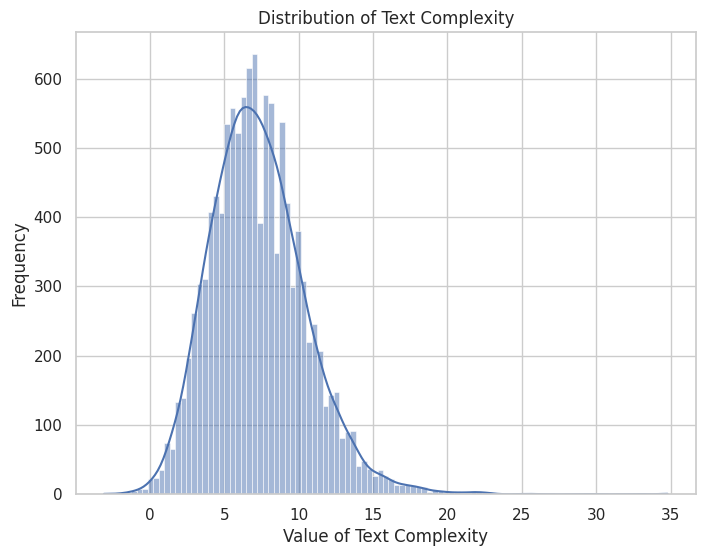

In [78]:
# Plot a histogram to visualize the distribution of the continuous variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='text_complexity', kde=True)
plt.title("Distribution of Text Complexity")
plt.xlabel("Value of Text Complexity")
plt.ylabel("Frequency")
plt.show()


In [86]:
#Create a box plot to check for outliers, median and quartiles
fig = px.box(df_train, y='text_complexity')

fig.update_xaxes(title_text='')
fig.update_layout(
    title='Boxplot for Text Complexity Feature',
    title_x=0.5        
)

fig.show()

In [87]:

# Create an interactive box plot using Plotly
fig = px.box(df_train, x='review', y='text_complexity')

fig.update_layout(
    title='Box Plot of Review vs Text Complexity',
    xaxis_title='Review',
    yaxis_title='Text Complexity',
    title_x=0.5
)

# Show the interactive plot
fig.show()

<Figure size 1200x600 with 0 Axes>

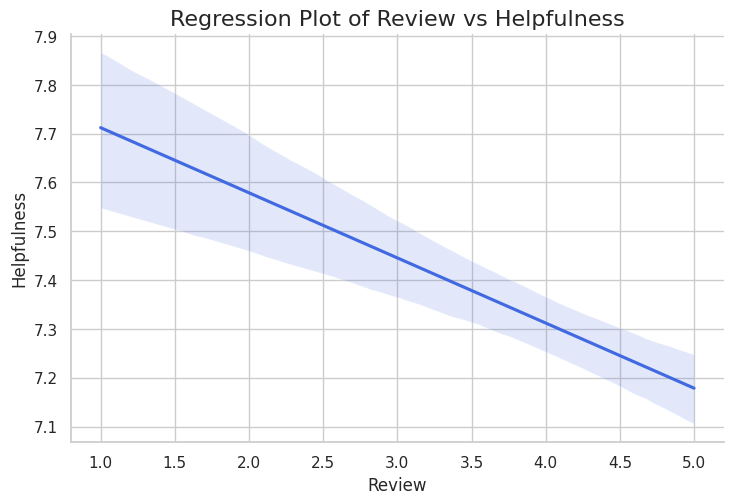

In [88]:
plt.figure(figsize=(12, 6))
sns.lmplot(x='review', y='text_complexity', data=df_train, height=5, aspect=1.5, scatter=False, line_kws={"color": "royalblue"})
plt.xlabel('Review')
plt.ylabel('Helpfulness')
plt.title('Regression Plot of Review vs Helpfulness', fontsize=16)
plt.grid(True)
plt.show()

## Word Count

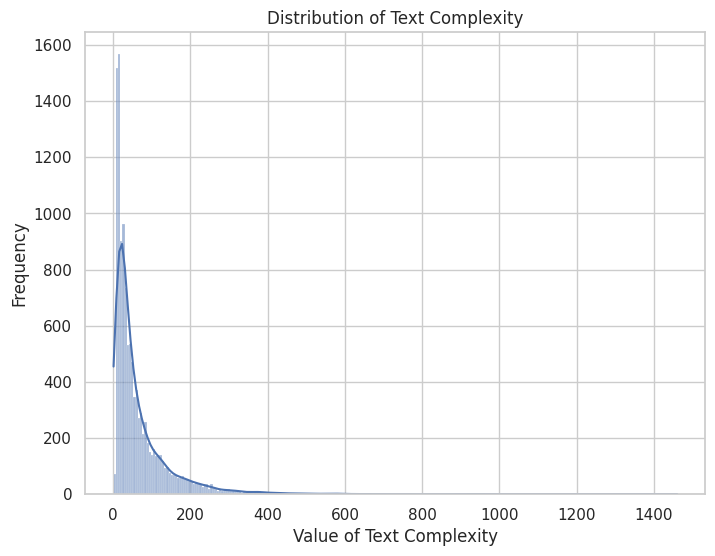

In [89]:
# Plot a histogram to visualize the distribution of the continuous variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='word_count', kde=True)
plt.title("Distribution of Text Complexity")
plt.xlabel("Value of Text Complexity")
plt.ylabel("Frequency")
plt.show()

In [91]:

# Create an interactive box plot using Plotly
fig = px.box(df_train, x='review', y='word_count')

fig.update_layout(
    title='Box Plot of Review vs Text Complexity',
    xaxis_title='Review',
    yaxis_title='Word Count',
    title_x=0.5
)

# Show the interactive plot
fig.show()

## EDA for Review Text Column

In [75]:
pd.set_option('display.max_colwidth', 150)

In [76]:
df_train[df_train['review']==5]['text_clean'].sample(5, random_state=1299)

414      receiving status book great condition order delivered time reading comment official guide great helpful prepare gmat test model exam practical exe...
105      really enjoy seires book janette oke great writer want contuniue read juat got next one series call heart canadian west break dawn canadian west book
15542    girlfriend recommended take class together likely would ever read book glad easiest read year mainly reading contemporary literature took brain mi...
5126                                                                                         beverly lewis doe another wonderful series make sure order hooked
2252                                                  great book eye opening must read student high school college adult age recommend whole uncle eric series
Name: text_clean, dtype: object

Word Cloud of most repeated 100 words on reviews with a review Score = 5. 


In [77]:
#FIXME Extraer texto por tipo de categoria

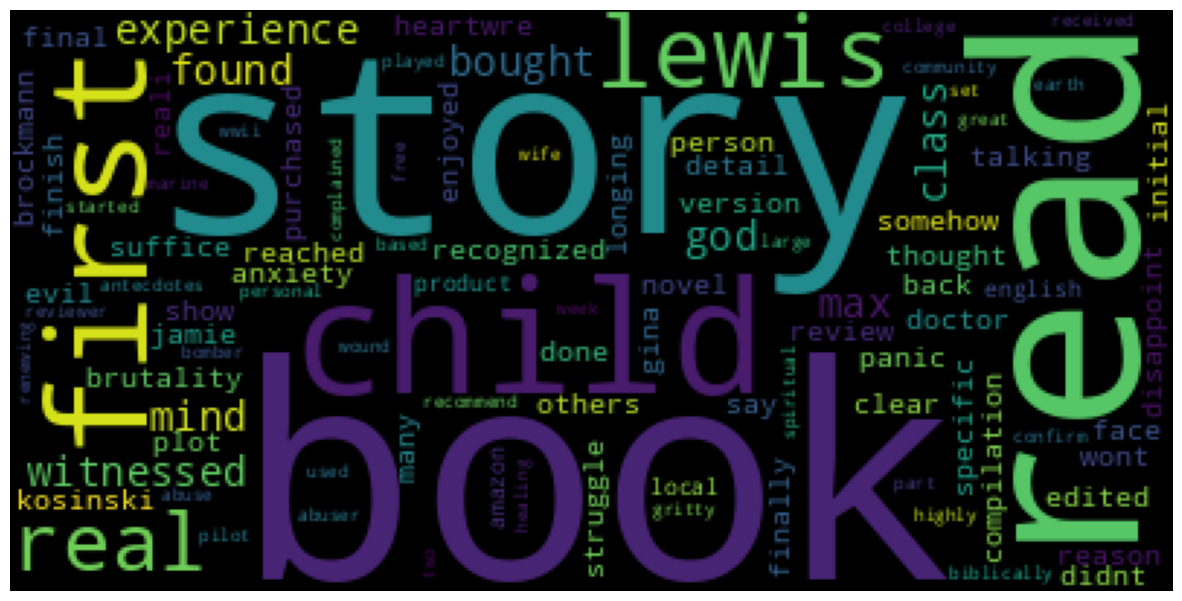

In [78]:
wordcloud5 = WordCloud(max_words=100).generate(str(df_train[df_train['review']==5]['text_clean']))

fig = plt.figure(figsize=(15,12))

plt.axis('off')

plt.imshow(wordcloud5)

plt.show()

In [79]:
df_train[df_train['review']==1]['text_clean'].sample(5, random_state=1299)

14899    unclear everyone raving book found skipping paragraph dismayed cliche copy actually used avoided like plague character seemingly content woman fin...
12969    silent prey hallmark space filler book designed meet contractual obligation poorly paced set away place make prey series unique try hard clever ne...
6629             common sense information basically book provides give helpful information instead telling refer state law differ state state waste time money
12965    robert heinlein well know science fiction writer assumed tunnel sky would fairly well written boy wrong premise book interesting however character...
2820                                                           bought book think latest edition edition obviously although printed amazon specify edition book
Name: text_clean, dtype: object

In [80]:
df_train[df_train['review']==3]['text_clean'].sample(5, random_state=1299)

11957                                                   link table content chapter order read book fine good read still pain neck keep order book put together
9272     despite bad publicity memoir people later determined truthful genre still flourishing recently reviewed kid right story four welch sibling left or...
5851     first chapter schniedewind book bible became book present main question later went detail throughout book always controversy actually wrote bible ...
5468     read many susan book enjoyed one would enjoy character moralistic free favor loved book portrayed heroine much backbone realising potential loved ...
2390     wanting read book long time finally got interested subject followed story closely news time week half time many shooting mother road trip rhode is...
Name: text_clean, dtype: object

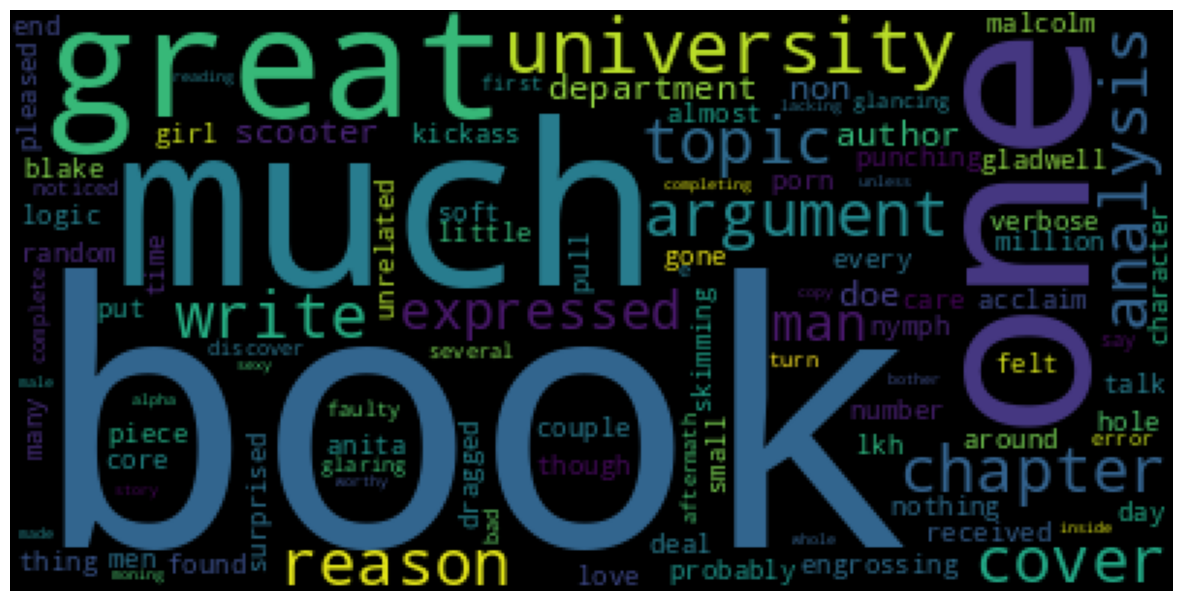

In [81]:
wordcloud1 = WordCloud(max_words=100).generate(str(df_train[df_train['review']==1]['text_clean']))

fig = plt.figure(figsize=(15,12))

plt.axis('off')

plt.imshow(wordcloud1)

plt.show()

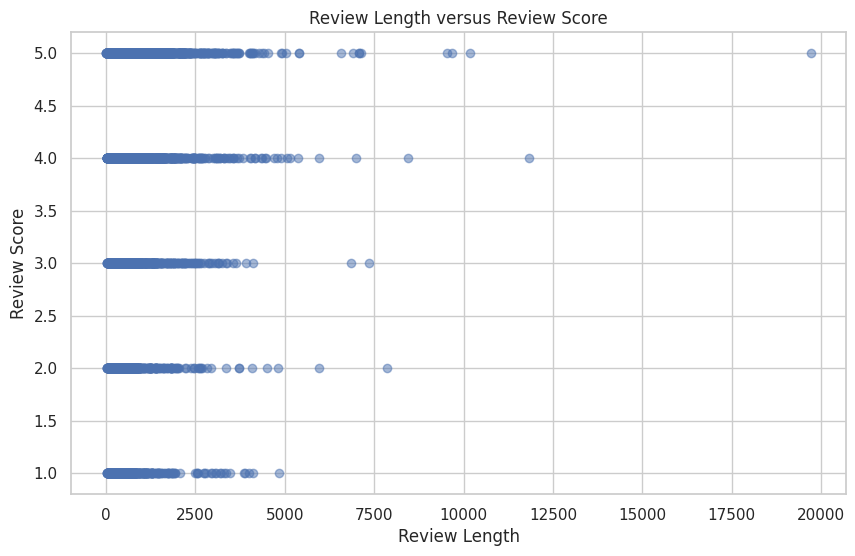

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['text_clean'].str.len(), df_train['review'], alpha=0.5)
plt.title('Review Length versus Review Score')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.show()

In [83]:
df_train['text_clean'].str.len().mean()

475.83461831737696

In [84]:
df_train['text_clean'].str.len().std()

664.8748159305998

In [85]:
long_reviews = df_train[df_train['text_clean'].str.len() > 2000].copy()

len(long_reviews)

356

In [86]:
long_reviews.describe().T

count         mean         std        min          25%  \
published_year      356.0  2006.516854    2.435014  2004.0000  2004.000000   
review_year         356.0  2008.595506    2.776031  2004.0000  2006.000000   
helpfulness         356.0     0.802280    0.287264     0.0000     0.666667   
compound_sentiment  356.0     0.595090    0.737462    -0.9985     0.860550   
text_complexity     356.0    11.091011   12.035610     4.7000     8.700000   
word_count          356.0   426.806180  214.840220   257.0000   314.000000   
review              356.0     4.044944    1.193032     1.0000     3.000000   

                            50%        75%        max  
published_year      2006.000000  2008.0000  2013.0000  
review_year         2009.000000  2011.0000  2013.0000  
helpfulness            0.981428     1.0000     1.0000  
compound_sentiment     0.985500     0.9966     0.9999  
text_complexity       10.100000    12.0000   232.2000  
word_count           366.500000   466.0000  2725.0000  
review                 4.000000     5.0000     5.0000

In [87]:
long_reviews['text_clean'].str.len().mean()

3104.3314606741574

In [88]:
short_reviews = df_train[df_train['text_clean'].str.len() < 200].copy()

len(short_reviews)

4977

In [89]:
short_reviews['text_clean'].str.len().mean()

111.9324894514768

In [90]:
short_reviews.describe().T

count         mean       std       min          25%  \
published_year      4977.0  2007.772152  2.777653  2004.000  2005.000000   
review_year         4977.0  2010.536468  2.536376  2004.000  2009.000000   
helpfulness         4977.0     0.815449  0.347232     0.000     0.833333   
compound_sentiment  4977.0     0.612032  0.395150    -0.967     0.476700   
text_complexity     4977.0     5.577034  2.842481    -3.100     3.700000   
word_count          4977.0    16.830219  6.345105     1.000    12.000000   
review              4977.0     4.349407  1.110403     1.000     4.000000   

                         50%       75%       max  
published_year      2007.000  2010.000  2013.000  
review_year         2012.000  2012.000  2013.000  
helpfulness            1.000     1.000     1.000  
compound_sentiment     0.765     0.886     0.992  
text_complexity        5.200     7.100    25.900  
word_count            16.000    22.000    34.000  
review                 5.000     5.000     5.000

In [ ]:
high_reviews = df_train[df_train['review'] == 5].copy()

high_reviews['text_clean'].str.len().mean()

In [ ]:
neutral_reviews = df_train[df_train['review'] == 3].copy() # Neutral ratings tend to be larger in words count

neutral_reviews['text_clean'].str.len().mean()

In [ ]:
low_reviews = df_train[df_train['review'] == 1].copy()

low_reviews['text_clean'].str.len().mean()

In [ ]:
# Create a figure and a set background color
fig = plt.figure(figsize=(10, 6))
plt.figure()
plt.hist2d(df_train['review_year'], df_train['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_train[df_train['review'] != 5]['review_year'], df_train[df_train['review'] != 5]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_train[(df_train['review'] != 4) & (df_train['review'] != 5)]['review_year'], df_train[(df_train['review'] != 4) & (df_train['review'] != 5)]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year (for rating from 1 to 5')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_train[df_train['review_year'] <= 2000]['review_year'], df_train[df_train['review_year'] <= 2000]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

# Multivariable Analysis

In [ ]:
df_train.info()

In [ ]:
df_train.select_dtypes('number').corr().style.background_gradient(cmap='Blues')

In [ ]:


#Histogram with SNS

numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//3 + 1, 3, i)
    sns.histplot(df_train[feature], kde=False, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(data=df_train, x= 'compound_sentiment', y='helpfulness')
plt.show()

In [ ]:
sns.pairplot(data=df_train, hue='review')
plt.show()

# Final Findings from EDA.

- Categorical features Authors, Publisher and Categories are biased to high score values. But have an important variability shown in the countplot figures. So, they will be kept. The model training and testing results with and without using the features, and the crossvalidation will determine if the variables should be removed.


# Model Selection, Training and Testing

- The current project is a regression exercise for predicting a continous value for the Review Score of the Review.
- The dataset contains multiple features. Some of the Categorical which are stored on lists (authors and Categories), a Cateogorical feature Publisher. 
- The dataset contains 4 numerical features, where we have discrete variables (published year, review_year) and continuos variables (helpfulness and compund_sentiment)
- Lastly, the dataset contains a text column that will be vectorized.

- Authors and Categories will be processed with One Hot Encoding, creating a Column for each category in the list. 
- Publisher will be encoded as well

In [ ]:
X_train.sample(1)


In [92]:
# Preprocessing for text data
text_vectorizer = TfidfVectorizer()
text_features_train = text_vectorizer.fit_transform(X_train['text_clean'])
text_features_test = text_vectorizer.transform(X_test['text_clean'])

In [93]:
text_features_train

<11800x41145 sparse matrix of type '<class 'numpy.float64'>'
	with 633984 stored elements in Compressed Sparse Row format>

In [94]:
pca = PCA(n_components=5, random_state=2109)

In [95]:
text_features_train_pcaed = pca.fit_transform(text_features_train.toarray())
text_features_test_pcaed = pca.transform(text_features_test.toarray())

In [96]:
text_features_train_pcaed

array([[-0.00251551, -0.05058023, -0.0117905 ,  0.04847078, -0.05785007],
       [ 0.07983496,  0.04593375,  0.08655385, -0.06245884,  0.07124158],
       [-0.00608719,  0.09812801, -0.01839425,  0.05186187, -0.05562143],
       ...,
       [-0.07487461, -0.01720911,  0.00601731, -0.00166668, -0.00782444],
       [-0.03233736, -0.03604272,  0.00447374,  0.01146067,  0.02032264],
       [-0.00471194,  0.08262946, -0.02446418,  0.07081379,  0.06677064]])

In [97]:
scaler = StandardScaler()
numerical_features_scaled_train = scaler.fit_transform(X_train[['published_year', 'review_year','word_count','text_complexity']])
numerical_features_scaled_test = scaler.transform(X_test[['published_year', 'review_year','word_count','text_complexity']])

In [98]:
numerical_features_nonscaled_train = X_train[['helpfulness', 'compound_sentiment']]
numerical_features_nonscaled_test = X_test[['helpfulness', 'compound_sentiment']]

In [99]:
enconder = OneHotEncoder()
categorical_features_train = enconder.fit_transform(X_train[['categories','publisher']])
categorical_features_test = enconder.transform(X_test[['categories','publisher']])

In [100]:
categorical_features_train

<11800x20 sparse matrix of type '<class 'numpy.float64'>'
	with 23600 stored elements in Compressed Sparse Row format>

In [101]:
X_train_final = np.concatenate((text_features_train_pcaed, categorical_features_train.toarray(), numerical_features_scaled_train, numerical_features_nonscaled_train), axis=1)
X_test_final = np.concatenate((text_features_test_pcaed, categorical_features_test.toarray(), numerical_features_scaled_test, numerical_features_nonscaled_test), axis=1)

# X_train_final = np.concatenate((text_features_train_pcaed, numerical_features_scaled_train, numerical_features_nonscaled_train), axis=1)
# X_test_final = np.concatenate((text_features_test_pcaed, numerical_features_scaled_test, numerical_features_nonscaled_test), axis=1)

# X_train_final = np.concatenate((text_features_train_pcaed, numerical_features_nonscaled_train), axis=1)
# X_test_final = np.concatenate((text_features_test_pcaed, numerical_features_nonscaled_test), axis=1)


In [102]:
X_train_final.shape

(11800, 31)

In [103]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

In [104]:
model_rf.fit(X_train_final, y_train)

RandomForestRegressor()

In [105]:
y_hat_rfr = model_rf.predict(X_test_final)
y_hat_rfr

array([4.8 , 3.92, 4.53, ..., 4.65, 4.77, 3.71])

In [106]:
print(f"Random Forest Regressor: Mean squared error: {mean_squared_error(y_test, y_hat_rfr):.4f}")
print(f"Random Forest Regressor: Coefficient of determination: {r2_score(y_test, y_hat_rfr):.4f}")

Random Forest Regressor: Mean squared error: 1.0460
Random Forest Regressor: Coefficient of determination: 0.2655


In [126]:
y_test.value_counts()

review
5.0    2323
4.0     803
3.0     351
1.0     253
2.0     204
Name: count, dtype: int64

In [128]:
df['Predicted_Value'].value_counts()

Predicted_Value
4.70    57
4.64    56
4.53    51
4.76    48
4.59    48
        ..
1.71     1
2.38     1
1.85     1
1.76     1
1.99     1
Name: count, Length: 299, dtype: int64

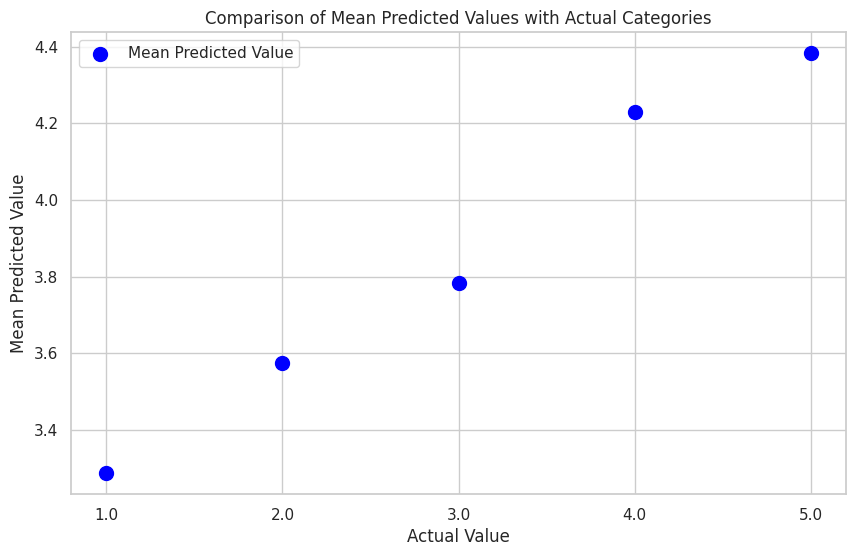

In [123]:
# Sample DataFrame with discrete actual values and continuous predicted values (replace with your data)
data = {'y_true': y_test,
        'Predicted_Value': y_hat_rfr}
df = pd.DataFrame(data)

# Calculate the mean predicted value for each category
mean_predictions = df.groupby('y_true')['Predicted_Value'].mean()

# Create a scatter plot with mean predicted values
plt.figure(figsize=(10, 6))
x = np.arange(len(mean_predictions))
plt.scatter(x, mean_predictions, color='blue', label='Mean Predicted Value', s=100)
plt.xticks(x, mean_predictions.index)
plt.xlabel('Actual Value')
plt.ylabel('Mean Predicted Value')
plt.title('Comparison of Mean Predicted Values with Actual Categories')
plt.legend()
plt.show()

In [107]:
from sklearn.svm import SVC
model_svm = SVC(kernel = "rbf", C = 1.0, gamma = 0.5)
model_svm.fit(X_train_final, y_train)

SVC(gamma=0.5)

In [108]:
y_pred_svm = model_svm.predict(X_test_final)
y_pred_svm

array([5., 5., 5., ..., 5., 5., 5.])

In [109]:
print(f"SVM: Mean squared error: {mean_squared_error(y_test, y_pred_svm):.4f}")
print(f"SVM: Coefficient of determination: {r2_score(y_test, y_pred_svm):.4f}")

SVM: Mean squared error: 1.8971
SVM: Coefficient of determination: -0.3321


In [110]:
from sklearn.linear_model import LinearRegression, Lasso
model_ls = Lasso(random_state=2014)

In [111]:
model_ls.fit(X_train_final, y_train)

Lasso(random_state=2014)

In [112]:
y_pred_lasso = model_ls.predict(X_test_final)
y_pred_lasso

array([4.20415254, 4.20415254, 4.20415254, ..., 4.20415254, 4.20415254,
       4.20415254])

In [113]:
print(f"Lasso: Mean squared error: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"Lasso: Coefficient of determination: {r2_score(y_test, y_pred_lasso):.4f}")

Lasso: Mean squared error: 1.4241
Lasso: Coefficient of determination: -0.0000


In [ ]:
# label_encoder_publisher = LabelEncoder()

In [ ]:
# vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=1.0)#min_df: Flotante de 0 a 1, Entero: La cuenta. cuantas veces tiene que haber aparecido la palabra para considerarla o eliminar

In [ ]:
# X_train_text_clean_vec = vectorizer.fit_transform(X_train['text_clean'])

In [ ]:
# X_train_text_clean_vec.shape

In [ ]:
# vectorizer.get_feature_names_out()

In [ ]:
# X_train['text_clean_vec']

In [ ]:
# pca = PCA(n_components=5, random_state=2109)
# pca_vecs = pca.fit_transform(X_train_text_clean_vec.toarray())

In [ ]:
# pca_df = pd.DataFrame()

# labels = y_train.reset_index(drop=True)

# pca_df['x_0'] = pca_vecs[:,0] #Todas las filas :,   | Columna 0
# pca_df['x_1'] = pca_vecs[:,1] #Todas las filas :,   | Columna 1
# pca_df['x_2'] = pca_vecs[:,2] #Todas las filas :,   | Columna 1
# pca_df['x_3'] = pca_vecs[:,3] #Todas las filas :,   | Columna 1
# pca_df['x_4'] = pca_vecs[:,4] #Todas las filas :,   | Columna 1
# pca_df['review'] = labels

In [ ]:
# sns.scatterplot(data=pca_df, x='x_3', y='x_4', hue='review')

In [ ]:
# pca_vecs